### Health Insurance Loan prediction

#### Build machine model to predict whether the person will be interested in health policy or not.The prediction based on the customer demographic details, previous policy details.

#### Import the necessary packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the dataset

In [4]:
train=pd.read_csv('train_Df64byy.csv')
test=pd.read_csv('test_YCcRUnU.csv')

#### Let see basic information about the train and test data

#### Train data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

#### Train dataset contains 12 column and 50881 observation.The target column is **Response**

#### Test data

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.7+ MB


#### Test dataset contains 12 columns and 21805 observations.

#### Lets take quick look at a train and test dataset

#### Train data

In [7]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


#### Test data

In [8]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


#### Exploratory Data Analysis

#### Lets analyze data by various levels analysis,
            - Univariate Analysis
            - Bivariate Analysis
            - Multivariate Analysis

### Target Column(Response)

#### First analyze the target column amd see the type of distribution

#### Before that the target column is in binary type lets encode it "0" as Not_Interested and "1" as Interested

In [9]:
response={0:'Not Interested',1:'Interested'}

In [10]:
train['Response']=train['Response'].map(response)

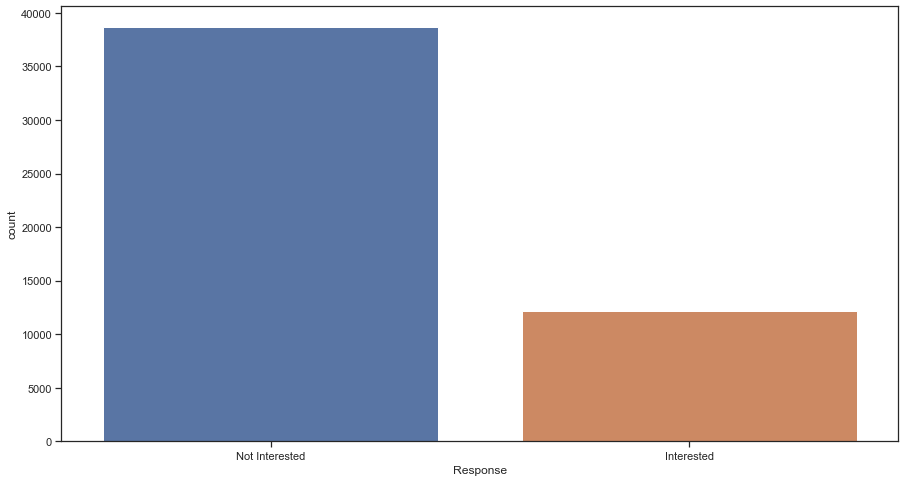

In [11]:
plt.figure(figsize=(15,8))
sns.set_theme(style="ticks")
target_column=sns.countplot(data=train,x='Response')

In [12]:
train.Response.value_counts()

Not Interested    38673
Interested        12209
Name: Response, dtype: int64

#### The above bar chart explains that most of the customers are not interested to take recommended policies.
#### There is a class imbalance(the customer response biased to one class(not interested in recommended policy))

### City Code

#### Lets see the number of cities and see how many customers are there.

In [13]:
train.City_Code.nunique()

36

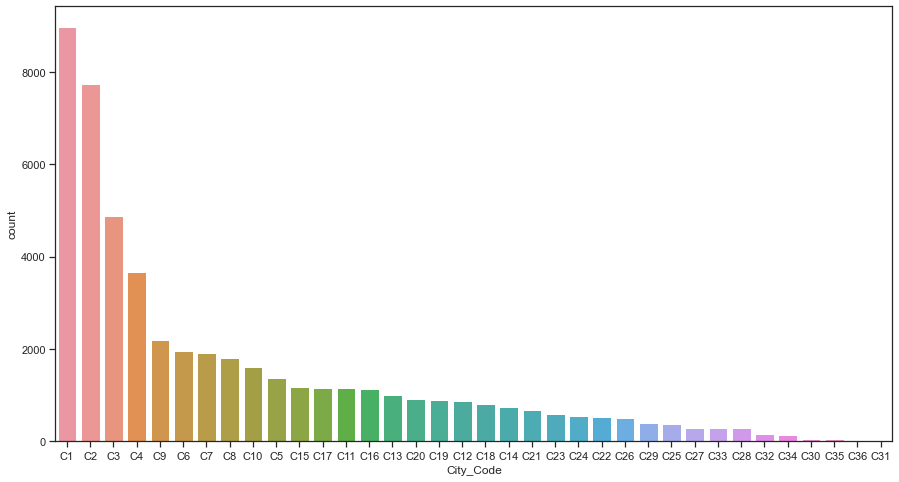

In [14]:
plt.figure(figsize=(15,8))
sns.set_theme(style="ticks")
city_code_column=sns.countplot(data=train,x='City_Code',order=train['City_Code'].value_counts().index)


#### There are totally 36 cities.
#### In that C1, C2, and C3 cities customer have filled more than 4000 health policy form.

#### Let's see city-wise customers interests in recommended policy 

In [15]:
from plotnine import *


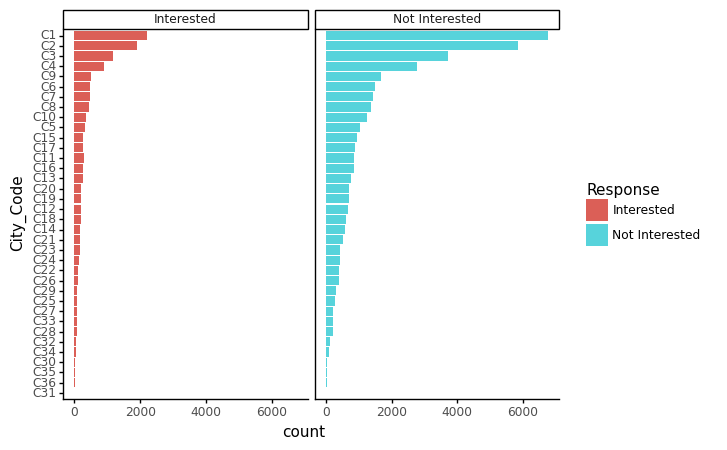

<ggplot: (17165698)>

In [16]:
citycode_response=(ggplot(train) + 
 geom_bar(aes(x='City_Code', fill='Response'),size=30)+
   scale_x_discrete(limits=train['City_Code'].value_counts().index.tolist()[::-1])+
 facet_wrap('Response')+
 coord_flip()+ theme_classic())
citycode_response

In [17]:
train.groupby(['City_Code','Response'],as_index=False)['Response'].agg({'total':'count'}).sort_values('total',ascending=False)

,City_Code,Response,total
1,C1,Not Interested,6765
23,C2,Not Interested,5854
45,C3,Not Interested,3728
61,C4,Not Interested,2782
0,C1,Interested,2208
...,...,...,...
46,C30,Interested,18
56,C35,Interested,16
49,C31,Not Interested,13
58,C36,Interested,5


#### The above chart explains that C1 and C2 Customers are highly interested in recommended policies when compare to the other city customers

### Region Code

#### Let's see the number of regions and region-wise customer interests in recommended policy.

In [18]:
train.Region_Code.nunique()

5316

C:\Users\Balaji\AppData\Local\Programs\Python\Python38-32\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 54'. Pick better value with 'binwidth'.


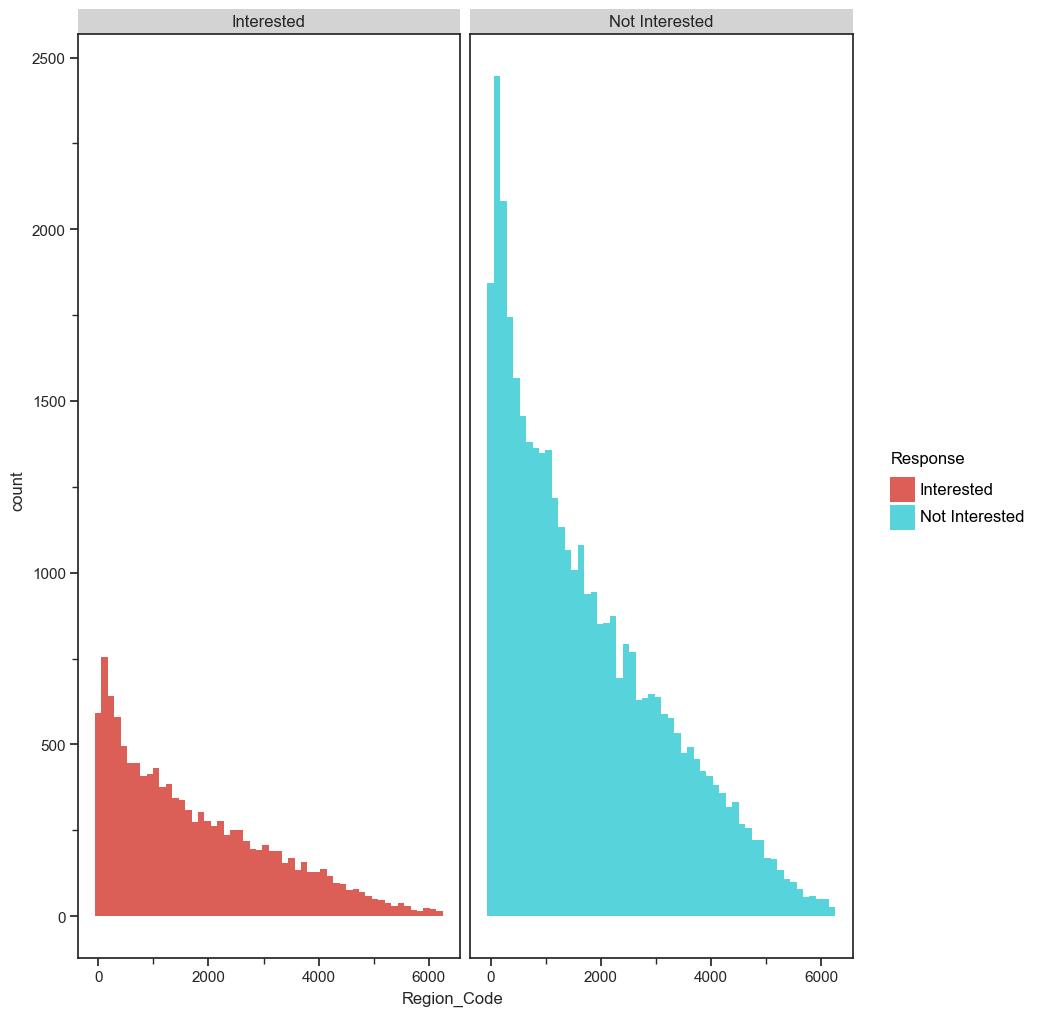

<ggplot: (-2130219570)>

In [19]:
regioncode_response=(ggplot(train, aes(x='Region_Code',fill='Response'))+geom_histogram()+   
                     facet_wrap('Response')+
theme_seaborn(style="ticks")+
            theme(figure_size=(10,12)) )
regioncode_response

#### The above chart explains that customer's interest in recommended policy gradually decreasing.

### Accomodation Type

#### Let's see how many customers are living in their own house or rented house and see how their interests vary in recommended policy. 

In [20]:
train.groupby( ['Accomodation_Type','Response'])['Response'].agg(['count']).reset_index()

,Accomodation_Type,Response,count
0,Owned,Interested,6763
1,Owned,Not Interested,21188
2,Rented,Interested,5446
3,Rented,Not Interested,17485


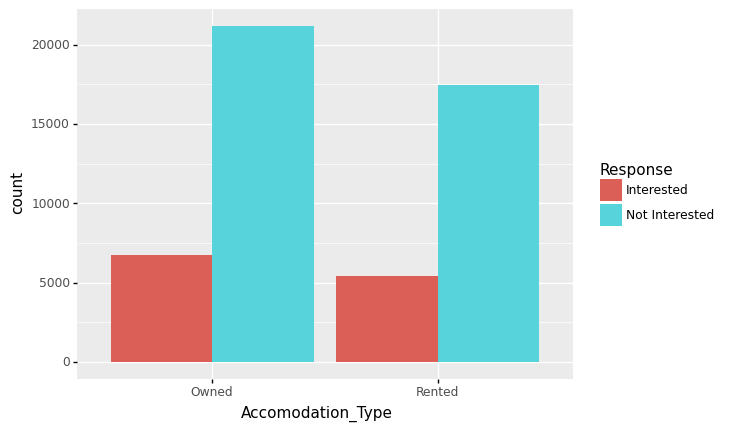

<ggplot: (-2130189154)>

In [21]:
(ggplot(train)+geom_bar(aes(x='Accomodation_Type',fill='Response'), position='dodge'))

#### The above chart explains that most of the customers are having own house and their interest in recommended policy is also high

#### Let's see the city-wise accomodation type and customer response

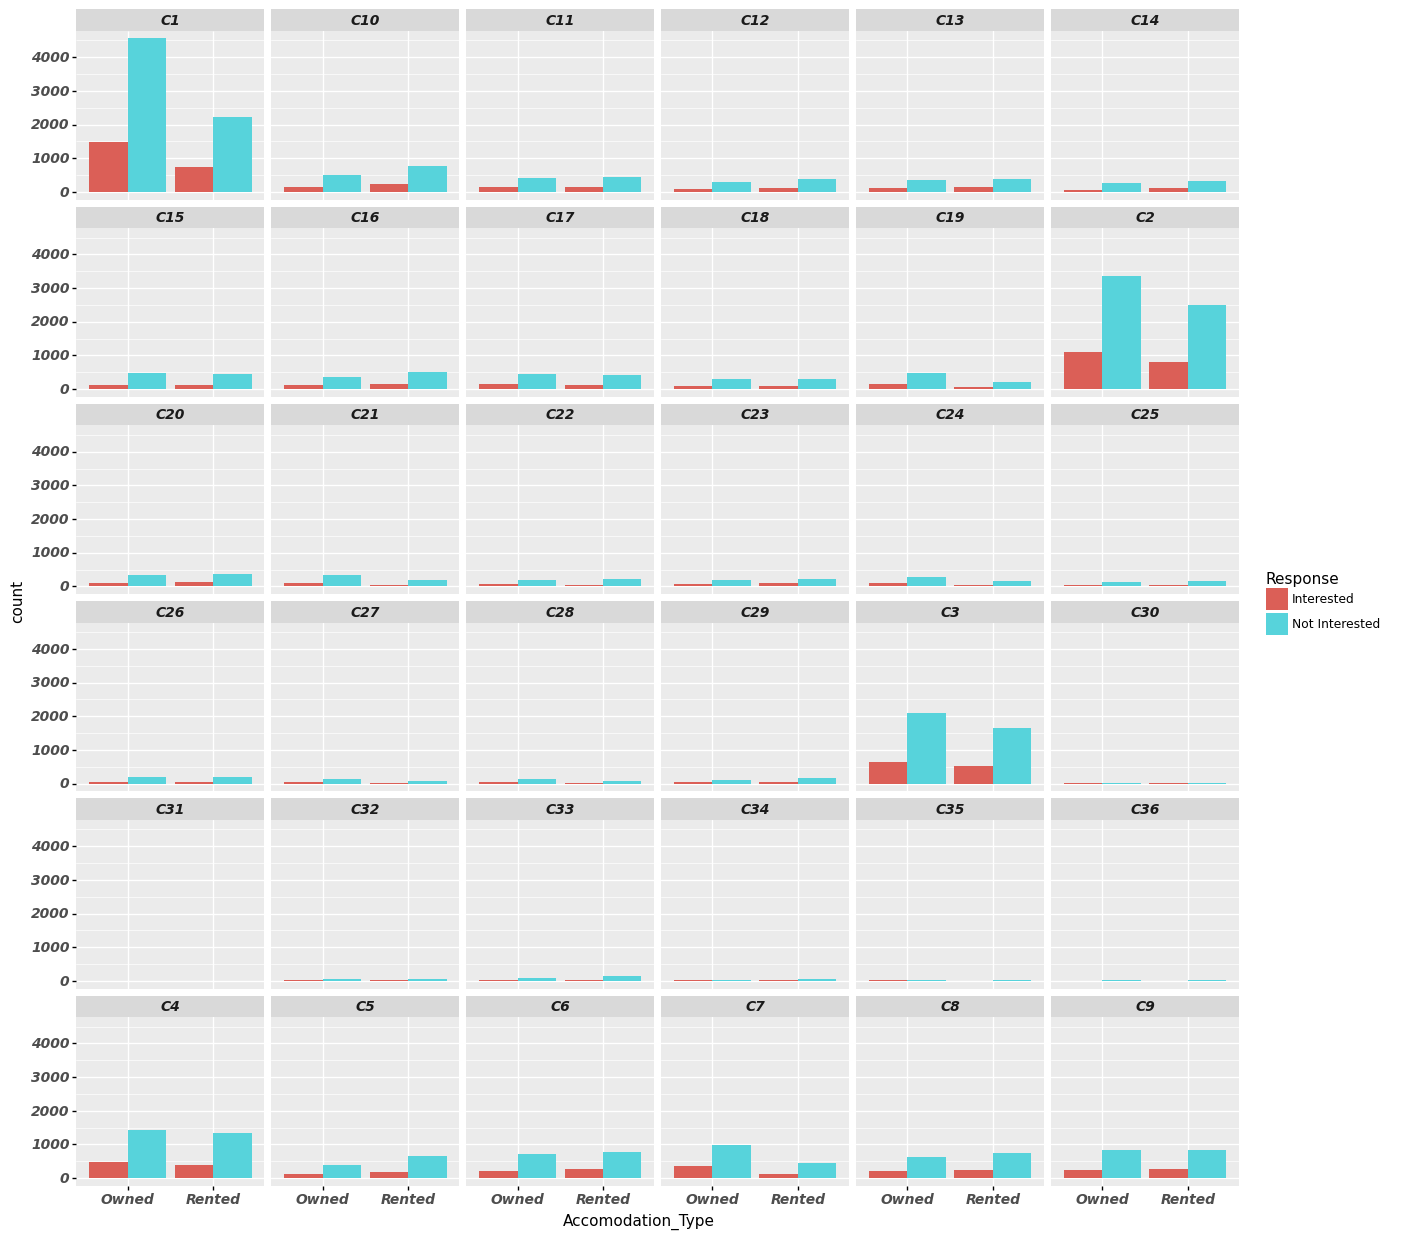

<ggplot: (17294502)>

In [22]:
(ggplot(train)+geom_bar(aes(x='Accomodation_Type',fill='Response'), position='dodge')+
facet_wrap('City_Code')+theme(figure_size=(15,15),
                             axis_text=element_text(style='oblique',size=10,weight='bold'),
                             strip_text=element_text(style='oblique',size=10,weight='bold')))

#### The above chart explains that in c1 to c4 cities more number of customers are having own house. In some cities, customers who are living in the rented house are showing high interest in recommended policy than the own house customers.

### Reco Insurance Type

#### Let's see the various recommended insurance types and customer response to them.

In [23]:
train['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

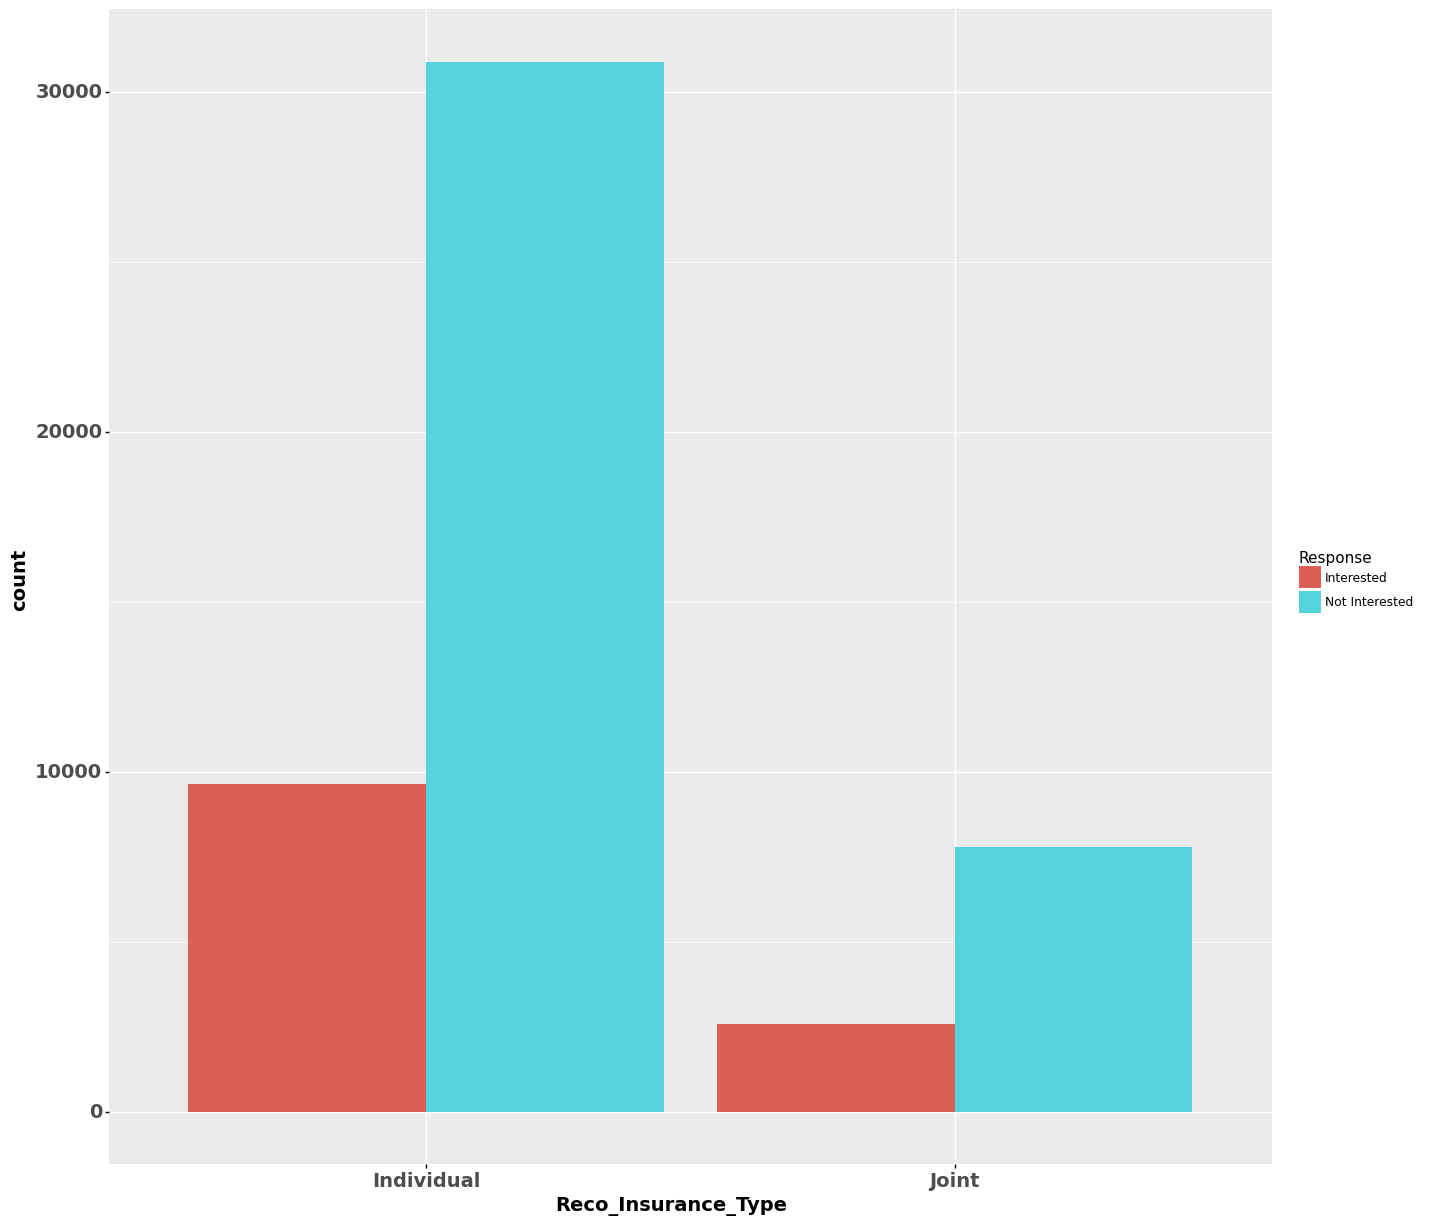

<ggplot: (-2129926898)>

In [24]:
(ggplot(train)+geom_bar(aes(x='Reco_Insurance_Type',fill='Response'), position='dodge')+
theme(figure_size=(15,15),
                             axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart explains that for more customers, an individual policy is recommended and they are showing high interest to take recommended policy.

#### Let's see customers accommodation,  recommended insurance type and customer responses.

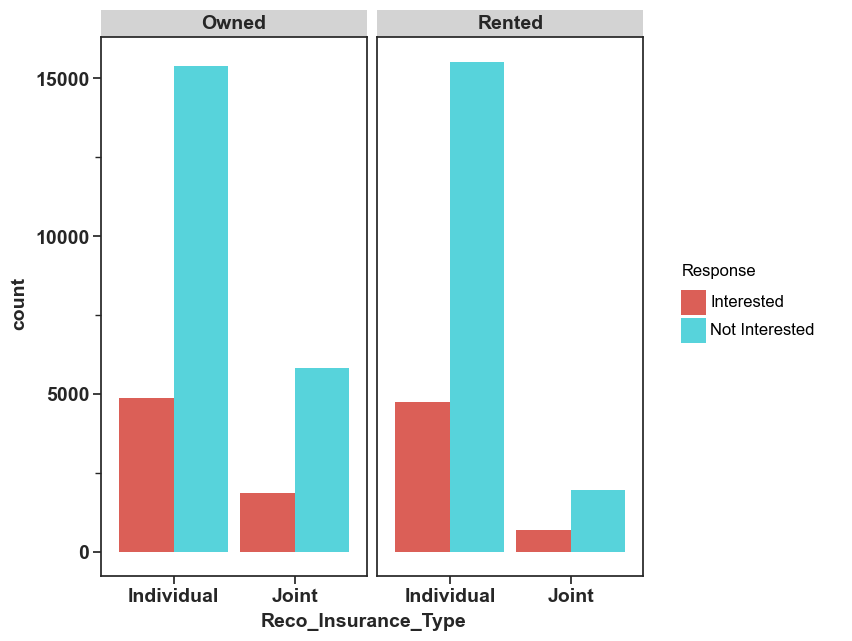

<ggplot: (17511647)>

In [25]:
(ggplot(train)+geom_bar(aes(x='Reco_Insurance_Type',fill='Response'), position='dodge')+
 facet_wrap('Accomodation_Type')+
 theme_seaborn(style='ticks')+
theme(figure_size=(7,7),
                             axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart explains that the customers who are having their own house and living in a rented house are highly recommended to take individual policy. The customers who have recommended take joint policies are less likely to take it.

### Recommended Policy Category

#### Let's see how many categories under the type of recommended policies.

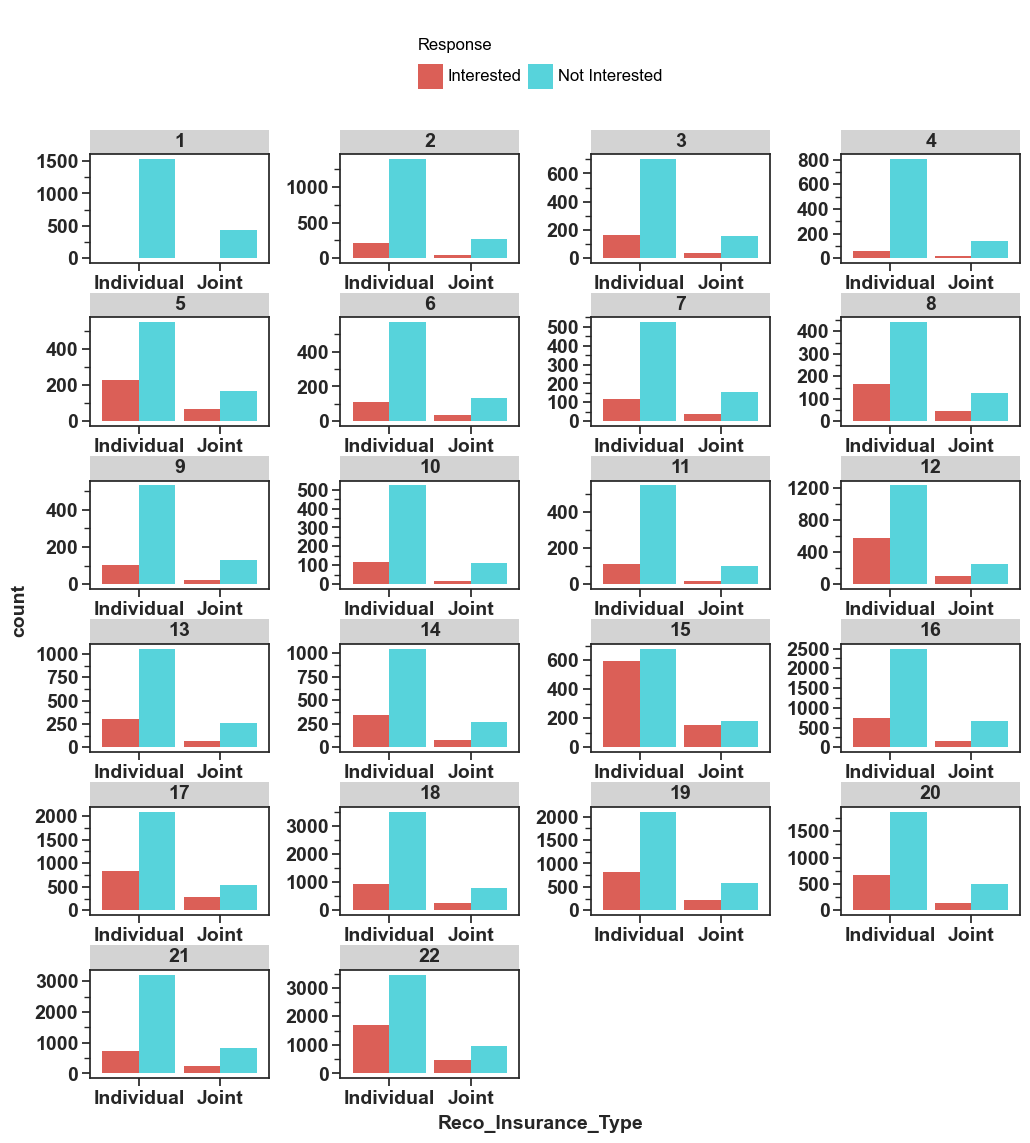

<ggplot: (17556938)>

In [26]:
(ggplot(train)+geom_bar(aes(x='Reco_Insurance_Type',fill='Response'), position='dodge')+
facet_wrap('Reco_Policy_Cat',ncol=4,scales="free")+
theme_seaborn(style='ticks')+
theme(figure_size=(12,12),
legend_position='top',
subplots_adjust={'hspace': 0.5,'wspace': 0.4},
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart explains that the 12th to 22nd category policies are highly popular in both customers.

### Recommended Policy Premium

#### Let's see if there is a relationship between the recommended policy premium and recommended policy category.Analyse results with customer's holding policy type and their response to recommended policy.

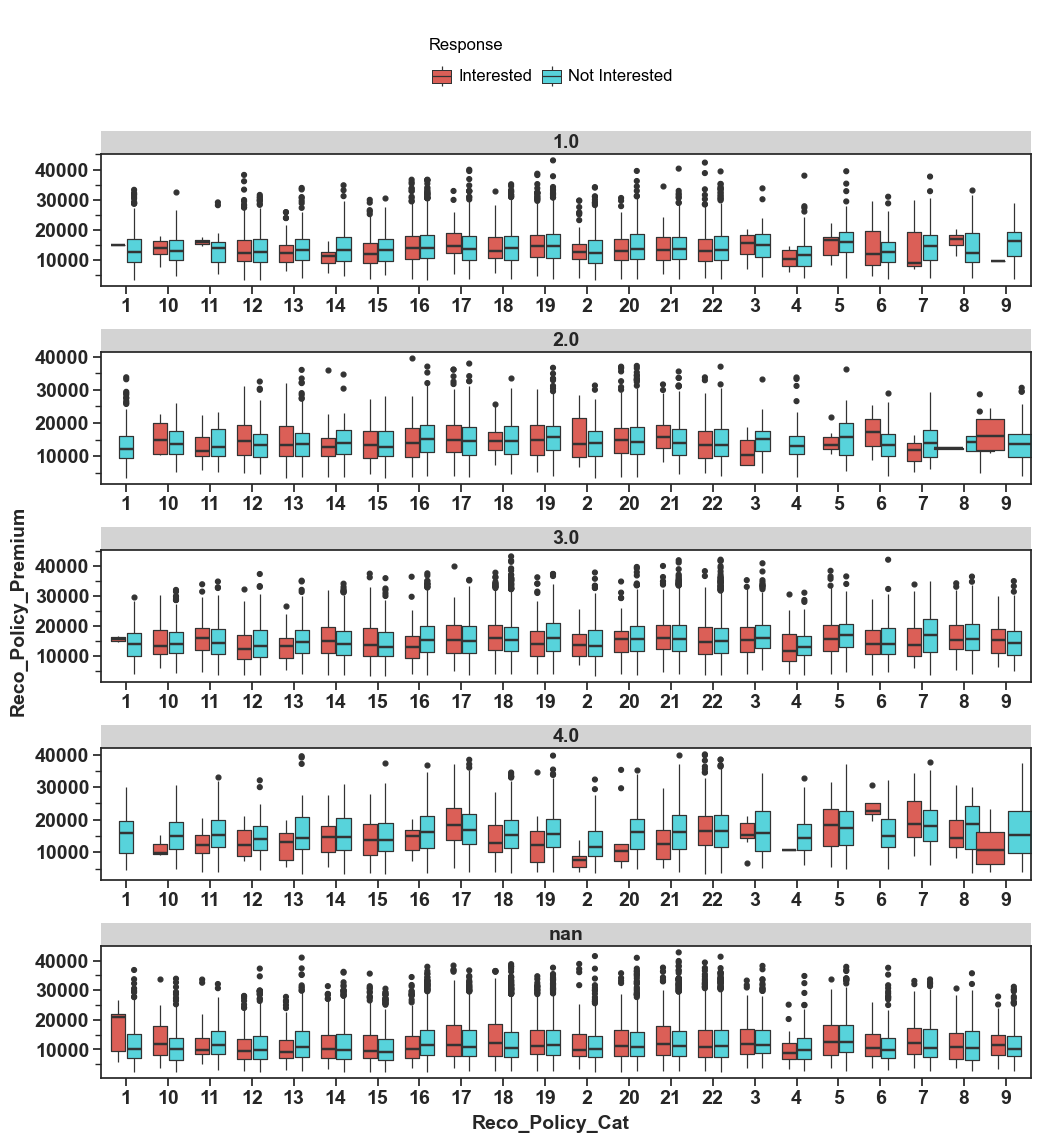

<ggplot: (-2129616732)>

In [27]:
(ggplot(train.astype({'Reco_Policy_Cat':'str'}))+geom_boxplot(aes(x='Reco_Policy_Cat',y='Reco_Policy_Premium',
                                fill='Response'), #position='dodge'
                         )+
facet_wrap('Holding_Policy_Type',nrow=5,scales="free")+
theme_seaborn(style='ticks')+
theme(figure_size=(12,12),
legend_position='top',
subplots_adjust={'hspace': 0.5,'wspace': 0.4},
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart explains that there is a difference between the recommended policy type and its premium amount.

#### Let's see which type of recommnded policy has more number of customers

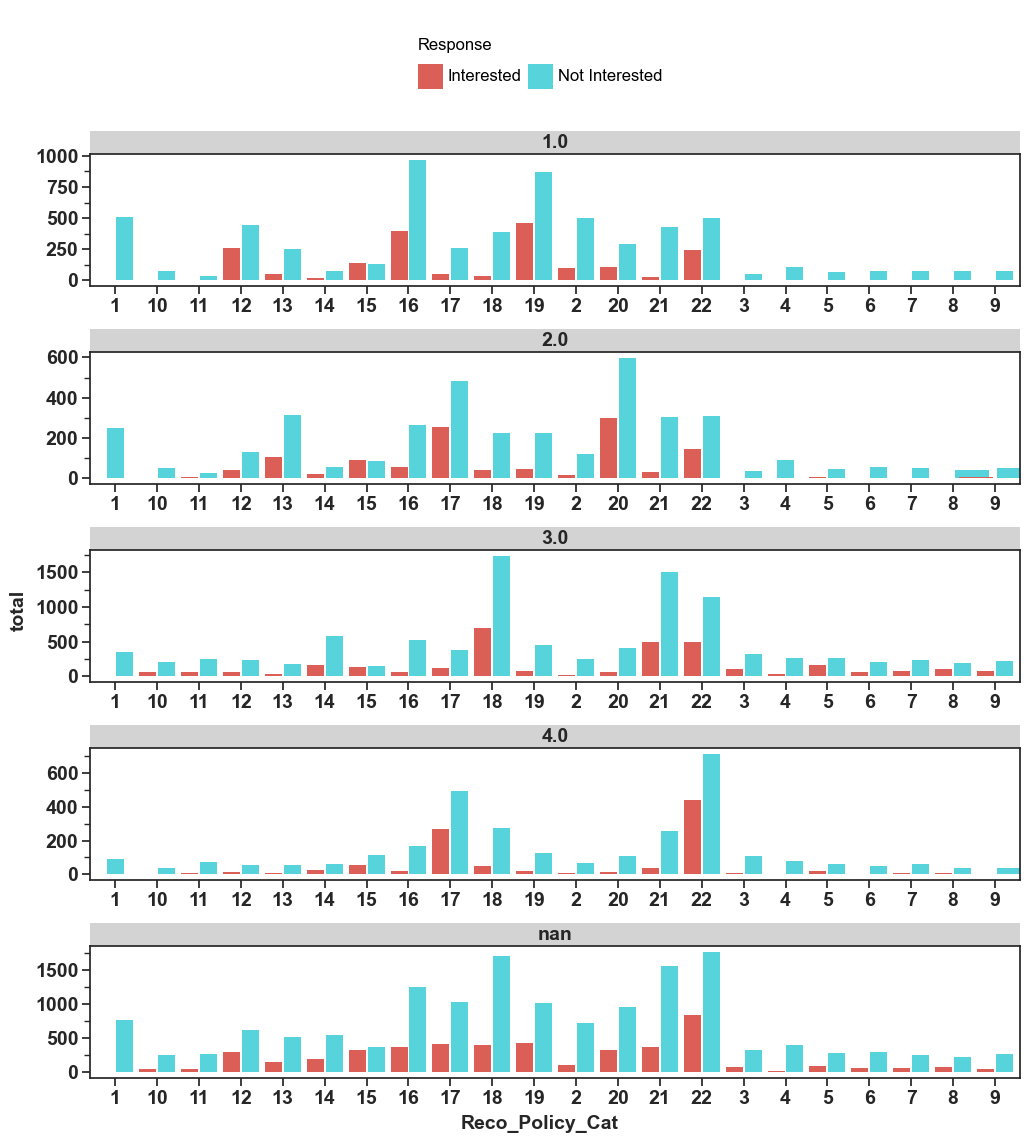

<ggplot: (-2130034792)>

In [28]:
hold_reco_response=train.groupby(['Holding_Policy_Type','Reco_Policy_Cat','Response'],dropna=False,as_index=False)['Response'].agg({'total':'count'}).sort_values(by='total',ascending=False)

(ggplot(hold_reco_response.astype({'Reco_Policy_Cat':'str','Holding_Policy_Type':'str'}))+
 geom_bar(aes(x='Reco_Policy_Cat',y='total',fill='Response'),stat='identity',position='dodge2')+
facet_wrap('Holding_Policy_Type',nrow=5,scales="free")+
theme_seaborn(style='ticks')+
theme(figure_size=(12,12),
legend_position='top',
subplots_adjust={'hspace': 0.5,'wspace': 0.4},
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))


#### Let's see city-wise recommended insurance types to customers and their responses to recommended policy.

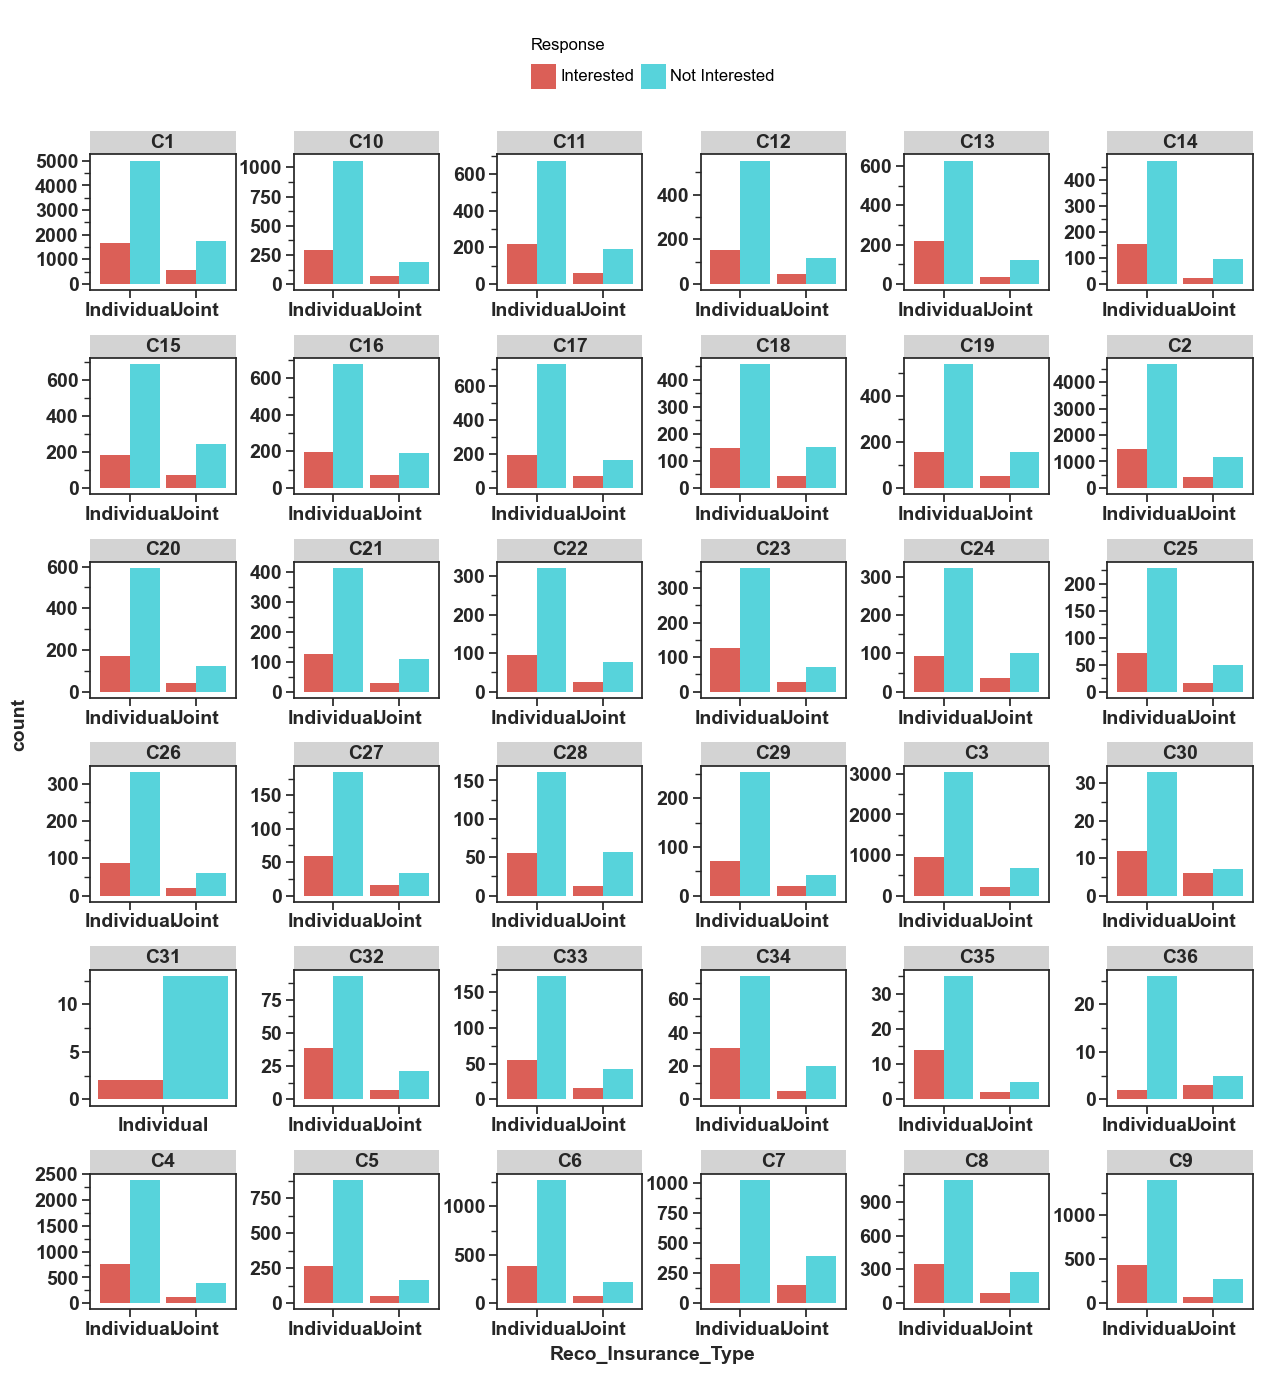

<ggplot: (-2129928440)>

In [29]:
(ggplot(train)+geom_bar(aes(x='Reco_Insurance_Type',fill='Response'), position='dodge')+
facet_wrap('City_Code',scales='free')+
theme_seaborn(style='ticks')+
theme(figure_size=(15,15),    
legend_position='top',
subplots_adjust={'hspace': 0.5,'wspace': 0.4},
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [30]:
train.groupby(['Reco_Insurance_Type','City_Code','Response']).filter(lambda x: (x['City_Code'] == 'C31').any())

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
2137,2138,C31,5110,Rented,Individual,59,59,No,NaN,1.0,3.0,22,13760.0,Interested
13033,13034,C31,5110,Rented,Individual,23,23,No,X2,NaN,NaN,20,9772.0,Not Interested
13367,13368,C31,5617,Owned,Individual,39,39,No,X1,14+,3.0,9,14040.0,Interested
16204,16205,C31,5931,Rented,Individual,32,32,No,X1,3.0,3.0,21,8160.0,Not Interested
18814,18815,C31,5178,Owned,Individual,33,33,No,X2,NaN,NaN,17,6290.0,Not Interested
28210,28211,C31,5569,Rented,Individual,25,25,No,X2,3.0,3.0,18,6950.0,Not Interested
28835,28836,C31,5079,Rented,Individual,23,23,No,NaN,NaN,NaN,17,4302.0,Not Interested
30334,30335,C31,5178,Owned,Individual,26,26,No,X3,NaN,NaN,22,6660.0,Not Interested
34230,34231,C31,5569,Owned,Individual,60,60,No,X5,7.0,4.0,17,15334.0,Not Interested
37561,37562,C31,5344,Rented,Individual,52,52,No,X2,1.0,1.0,1,17136.0,Not Interested


#### The above chart explains that in city c31 there is no joint policy recommended to customers.

### Upper Age

#### Let's see the customer's upper age distribution and their responses to the recommended policy.

In [31]:
train.groupby(['Response']).agg({'Upper_Age':['min','mean','median','max']})

Upper_Age                      
                     min       mean median max
Response                                      
Interested            18  44.941682     44  75
Not Interested        18  44.829312     44  75

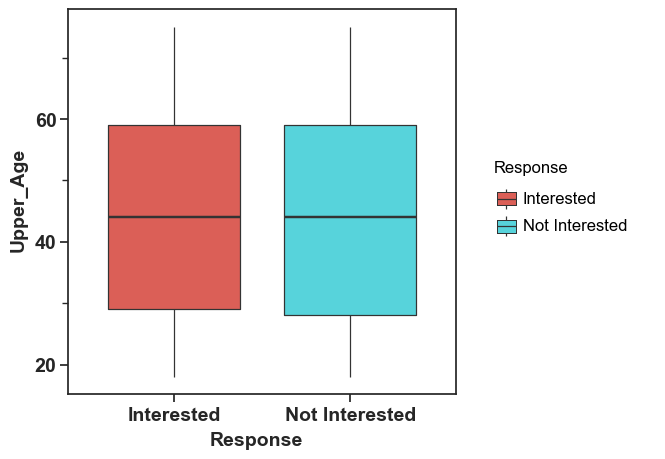

<ggplot: (-2129715018)>

In [32]:
(ggplot(train)+geom_boxplot(aes(x='Response',y='Upper_Age',fill='Response'))+
theme_seaborn(style='ticks')+
theme(figure_size=(5,5),
                             axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above boxplot explains that there is no significant difference between the age of customer who is interested or not interested in recommended policies.

#### Let's analyze the customer's upper age with their type of accommodation and recommended policy types to them and also their interest in the recommended policy.

In [33]:
train.groupby(['Accomodation_Type','Reco_Insurance_Type','Response']).agg({'Upper_Age':['min','median','mean','max']})

Upper_Age         \
                                                           min median   
Accomodation_Type Reco_Insurance_Type Response                          
Owned             Individual          Interested            18     51   
                                      Not Interested        18     51   
                  Joint               Interested            20     56   
                                      Not Interested        19     57   
Rented            Individual          Interested            18     30   
                                      Not Interested        18     29   
                  Joint               Interested            21     44   
                                      Not Interested        19     44   

                                                                     
                                                           mean max  
Accomodation_Type Reco_Insurance_Type Response                       
Owned             Individual          Interested      49.849980  75  
                                      Not Interested  50.105034  75  
                  Joint               Interested      54.786361  75  
                                      Not Interested  55.168617  75  
Rented            Individual          Interested      35.923854  75  
                                      Not Interested  35.632603  75  
                  Joint               Interested      45.534682  75  
                                      Not Interested  45.603562  75

C:\Users\Balaji\AppData\Local\Programs\Python\Python38-32\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 35'. Pick better value with 'binwidth'.


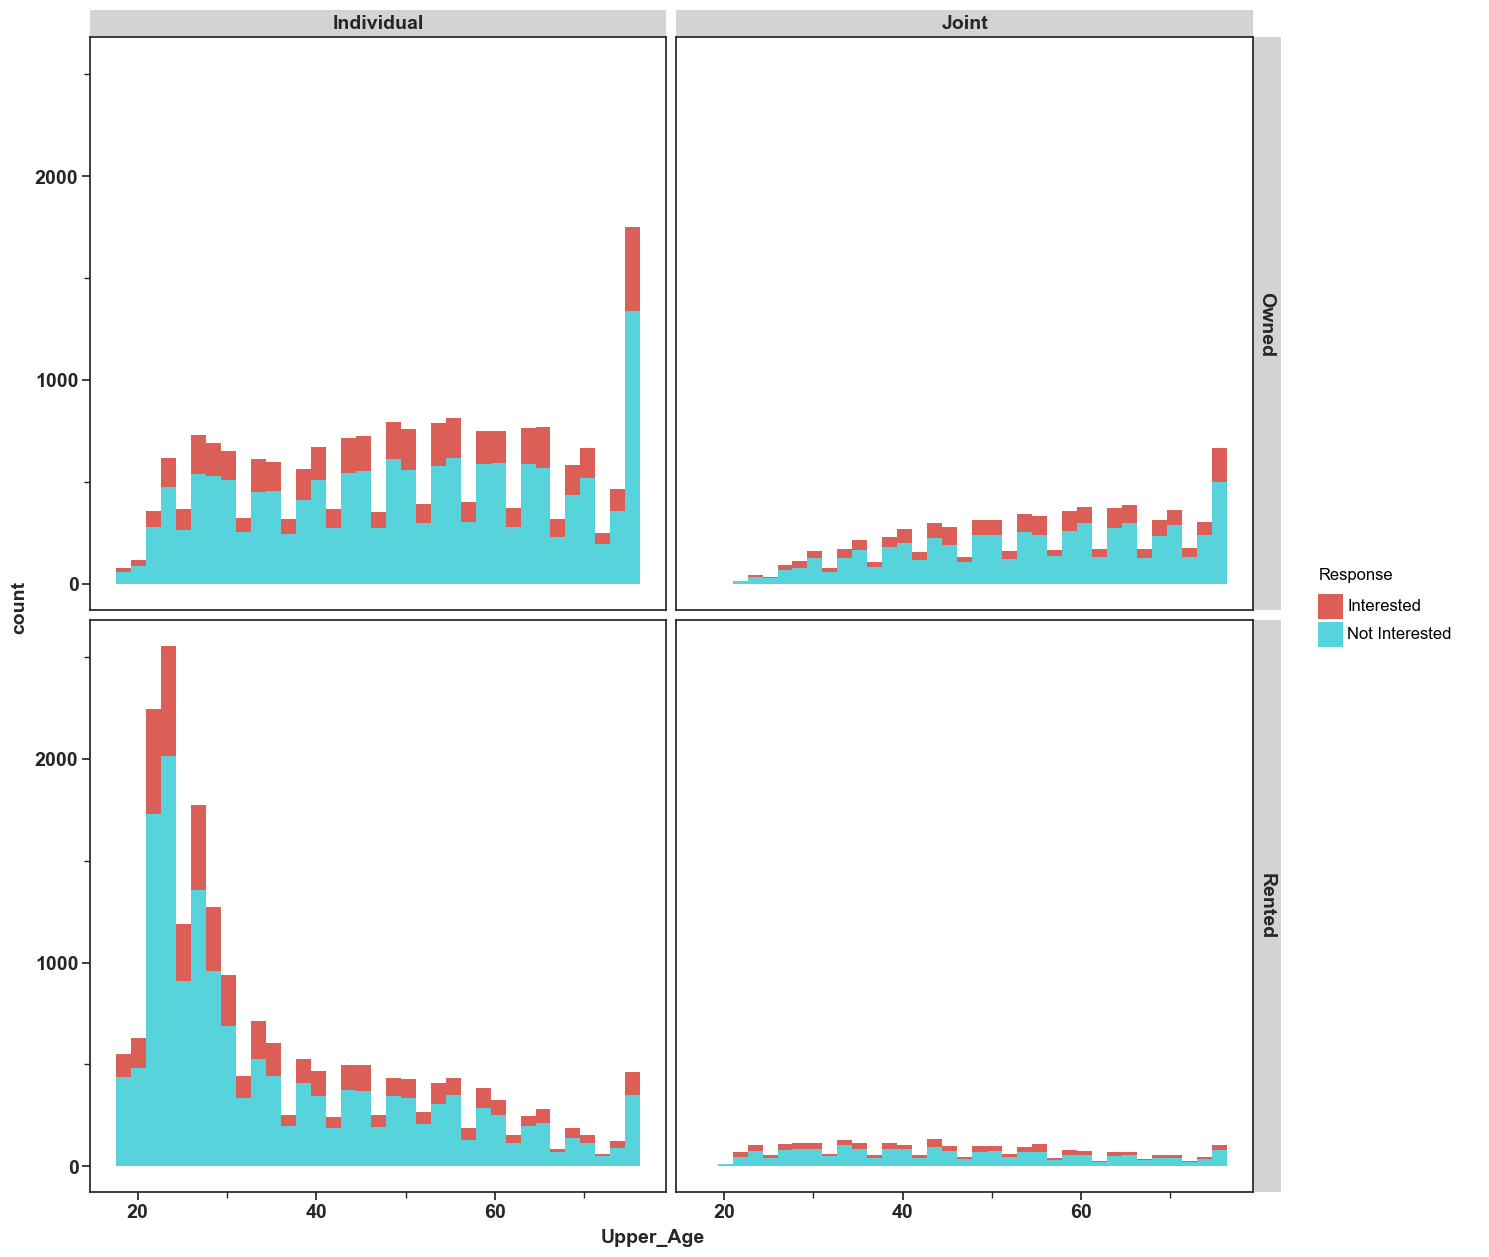

<ggplot: (-2129000895)>

In [34]:
(ggplot(train)+geom_histogram(aes(x='Upper_Age',fill='Response'))+
facet_grid('Accomodation_Type~Reco_Insurance_Type')+
theme_seaborn(style='ticks')+
theme(figure_size=(15,15),
                             axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart explains that rented house customers in the age range of 20 to 30 years are highly interested to take recommended policy. Moreover,  own house customers whose age is 70 and above showing high interest in the recommended policy than to middle age customers.

C:\Users\Balaji\AppData\Local\Programs\Python\Python38-32\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 35'. Pick better value with 'binwidth'.


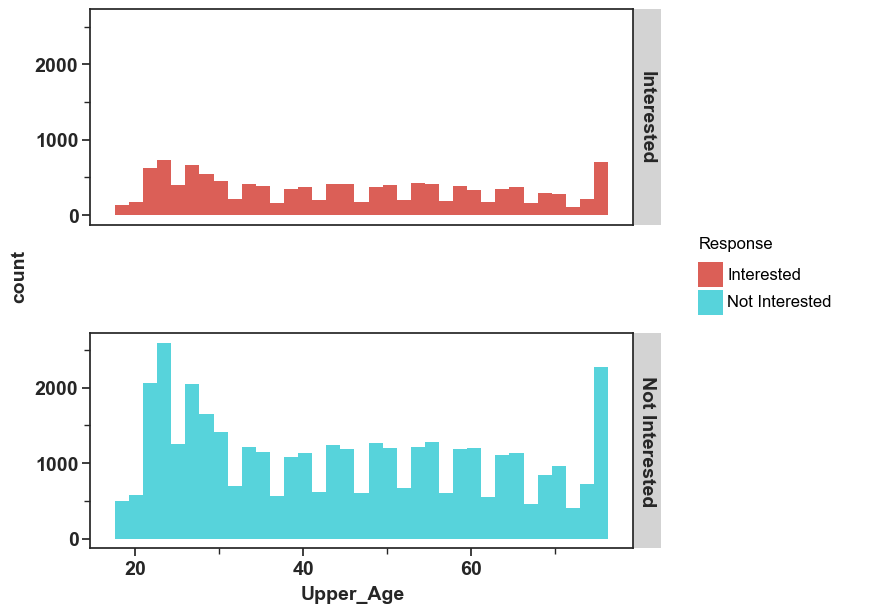

<ggplot: (-2134652686)>

In [35]:
(ggplot(train)+geom_histogram(aes(x='Upper_Age',fill='Response'))+
facet_grid('Response~')+
theme_seaborn(style='ticks')+
theme(figure_size=(7,7),    subplots_adjust={'hspace': 0.5,'wspace': 0.4},
                               axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart explains that more number customers are in the age range of 19 to 20

#### Let's see city-wise customer's upper age distribution and their responses in the recommended policy.

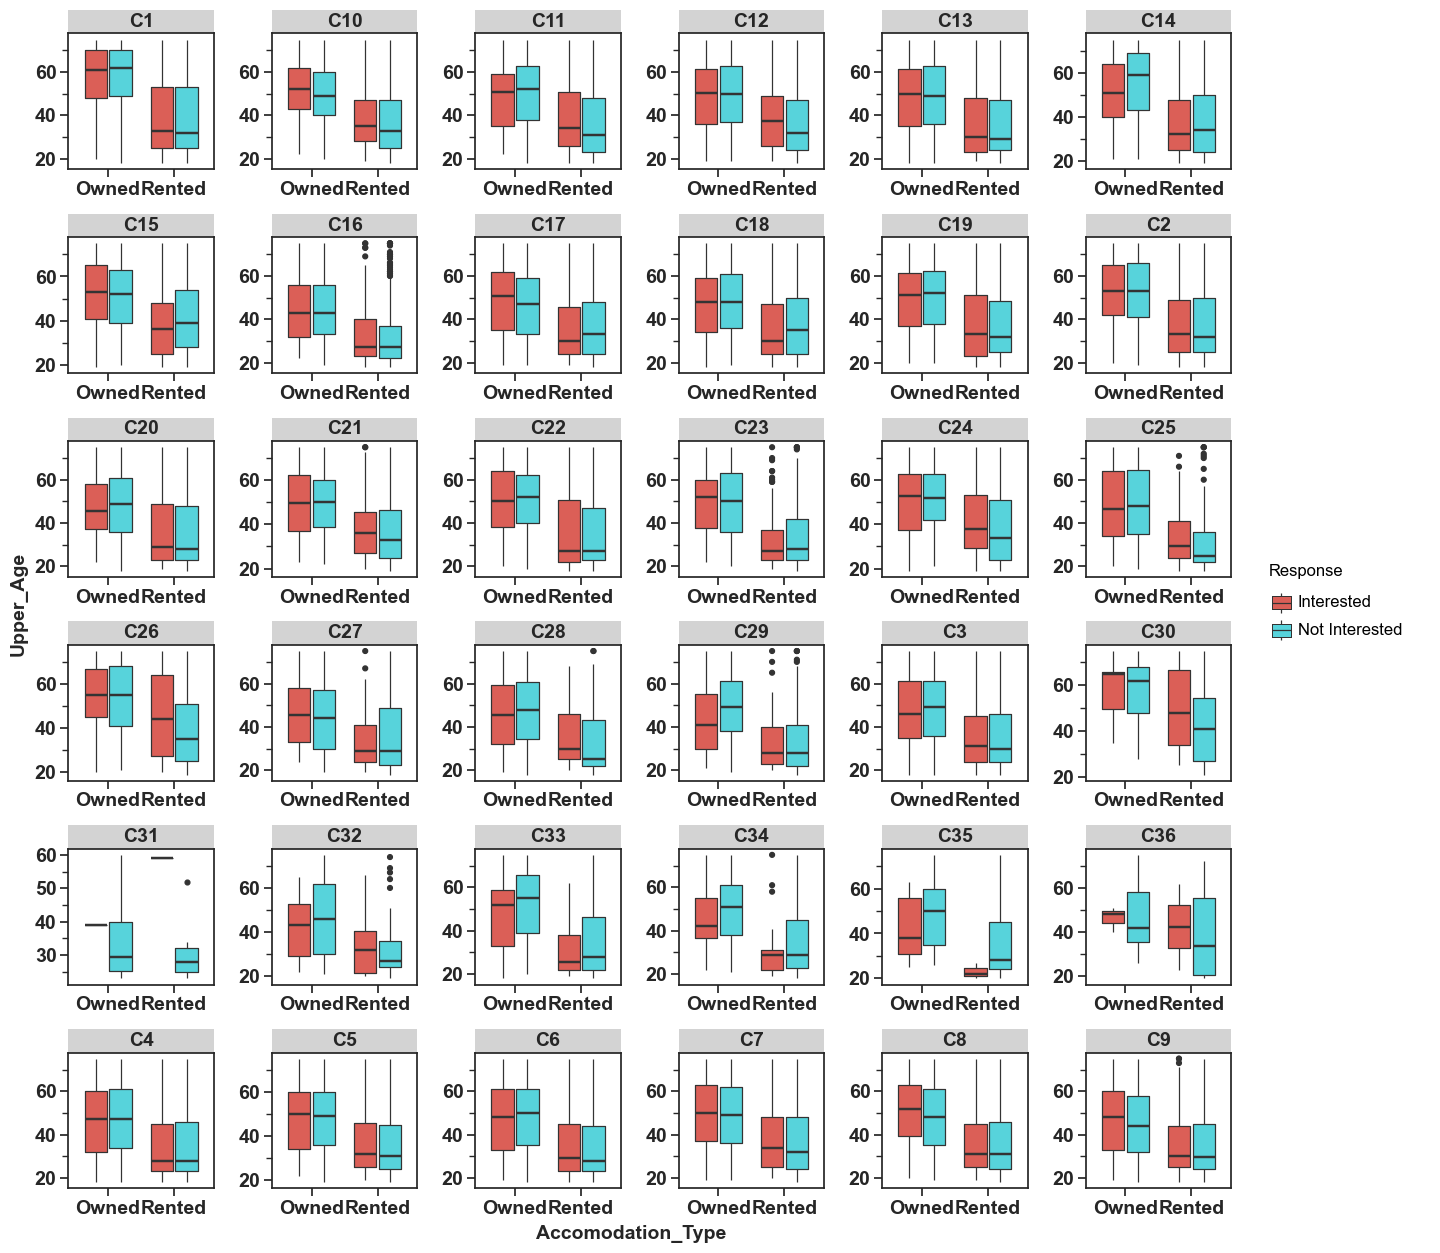

<ggplot: (17295394)>

In [36]:
(ggplot(train)+geom_boxplot(aes(y='Upper_Age',x='Accomodation_Type',fill='Response'))+
facet_wrap('City_Code',scales='free')+
theme_seaborn(style='ticks')+
theme(figure_size=(15,15),    subplots_adjust={'hspace': 0.5,'wspace': 0.4},
                               axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart shows that each city customer's accommodation type has a different age distribution.  

### Lower Age

#### If the customer has taken a joint policy that time two members age should have to be recorded. The same thing applies here if the customer has taken an individual policy there is no need to maintain both the upper and lower ages of a customer. If it is a joint policy has to be maintained.

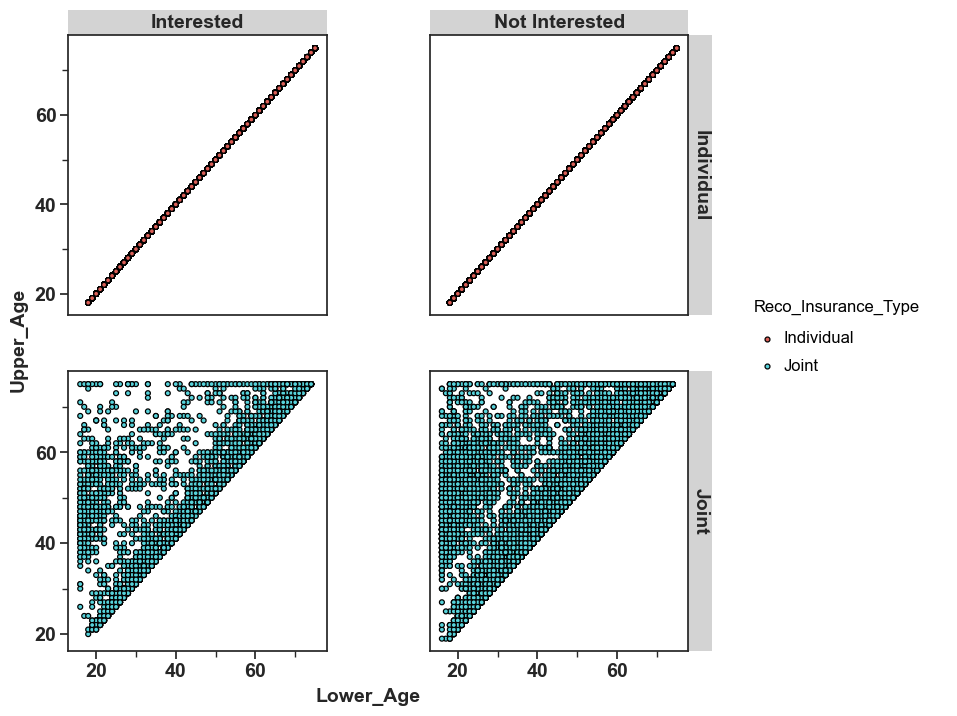

<ggplot: (-2129971979)>

In [37]:


(ggplot(train)+geom_point(aes(x='Lower_Age',y='Upper_Age',fill='Reco_Insurance_Type'))+
facet_grid('Reco_Insurance_Type~Response' ,scales='free')+
theme_seaborn(style='ticks')+
theme(figure_size=(8,8),    subplots_adjust={'hspace': 0.2,'wspace': 0.4},
                               axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))


### Is Spouse

#### If the customers are married to each other. Then they are recommended to take a joint policy.

#### Let's see how many customers are recommended to take a joint policy with their spouse and see is there any difference in their responses to the recommended policy.

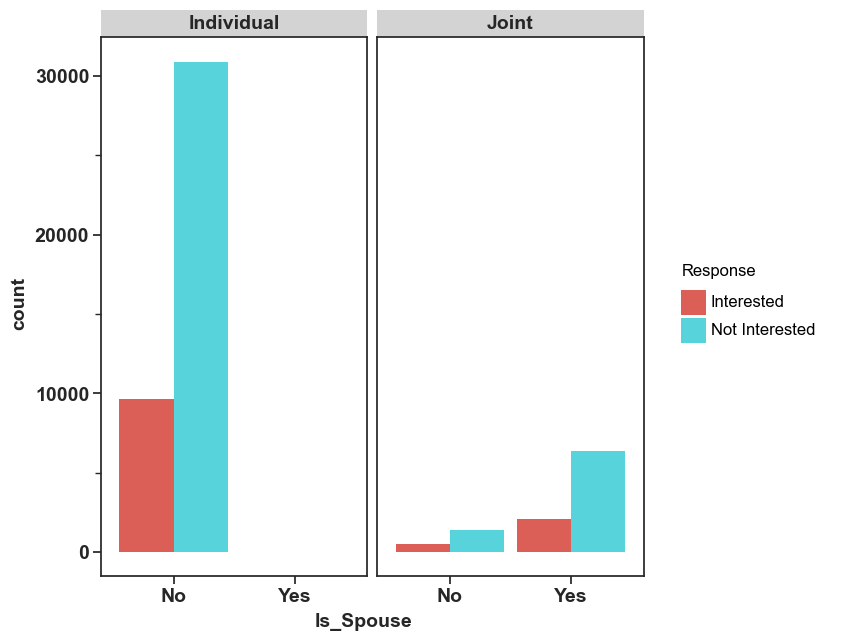

<ggplot: (17171673)>

In [38]:
(ggplot(train)+geom_bar(aes(x='Is_Spouse',fill='Response'), position='dodge')+
 facet_wrap('Reco_Insurance_Type')+
 theme_seaborn(style='ticks')+
theme(figure_size=(7,7),
                             axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))

In [39]:
train.groupby(['Reco_Insurance_Type','Is_Spouse','Response'],as_index=False)['Response'].agg({'Total':'count'}).sort_values(by='Total',ascending=False)

,Reco_Insurance_Type,Is_Spouse,Response,Total
1,Individual,No,Not Interested,30896
0,Individual,No,Interested,9640
5,Joint,Yes,Not Interested,6370
4,Joint,Yes,Interested,2052
3,Joint,No,Not Interested,1407
2,Joint,No,Interested,517


#### The above chart explains that some customers who are recommended to take the joint policy with their spouse are less interested in that recommended policy.


#### Let's see how many customers are recommended to take a joint policy with their spouse or other customers. In that how many of them living in own or rented house. Let's see their responses to the recommended policy.

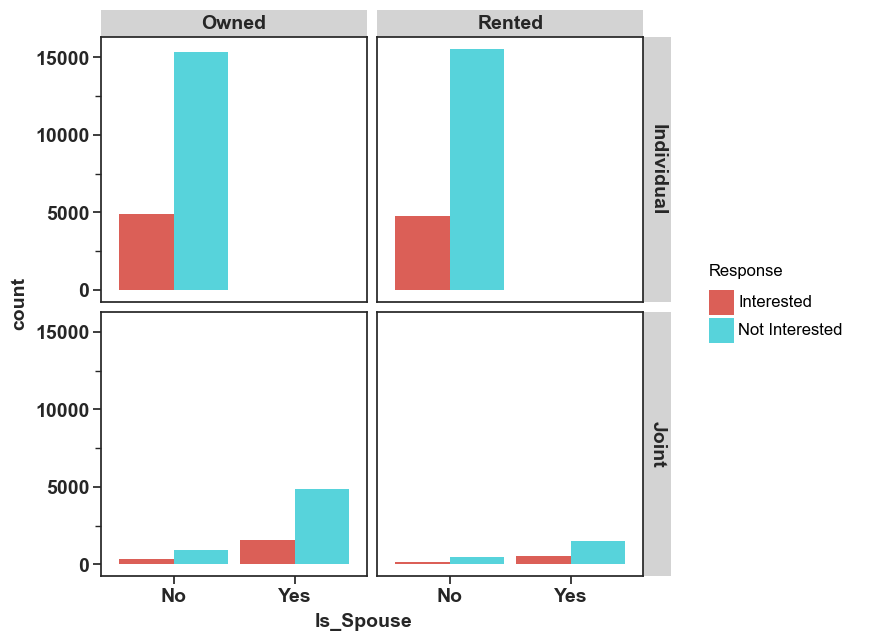

<ggplot: (-2129628547)>

In [40]:
(ggplot(train)+geom_bar(aes(x='Is_Spouse',fill='Response'), position='dodge')+
 facet_grid('Reco_Insurance_Type~Accomodation_Type')+
 theme_seaborn(style='ticks')+
theme(figure_size=(7,7),
                             axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart explains that most of the rented house customers are less interested in a recommended joint policy.

#### Let's analyze the customer's upper age with their accommodation and their recommended joint policy (that is whether they have taken a  recommended joint policy with their spouse or other family members?)

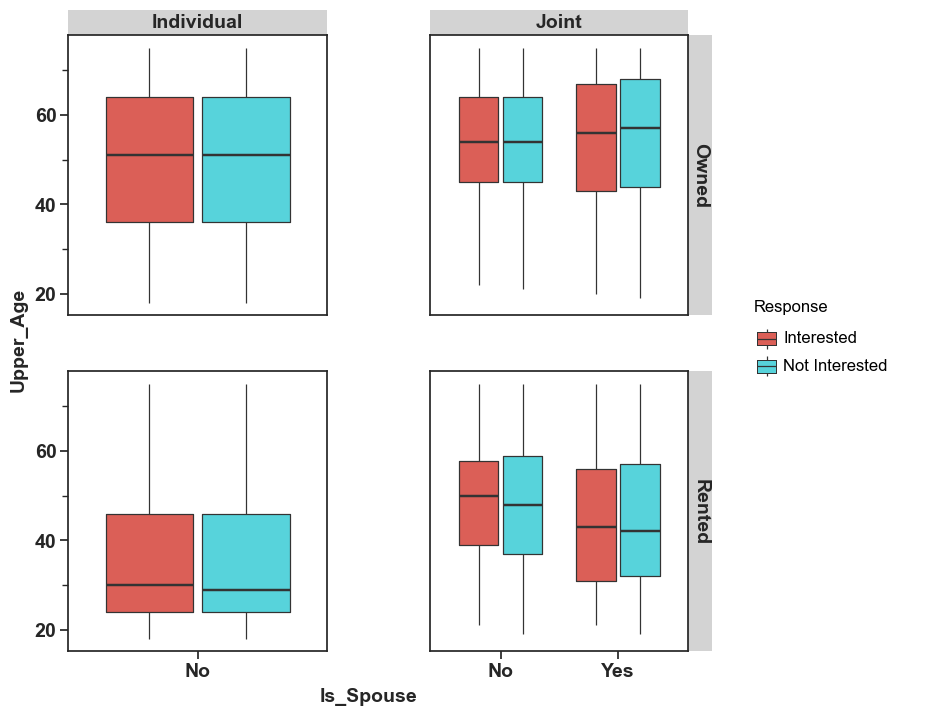

<ggplot: (4073659)>

In [41]:
(ggplot(train)+geom_boxplot(aes(x='Is_Spouse',y='Upper_Age',fill='Response'))+
facet_grid('Accomodation_Type~Reco_Insurance_Type' ,scales='free')+
theme_seaborn(style='ticks')+
theme(figure_size=(8,8),    subplots_adjust={'hspace': 0.2,'wspace': 0.4},
                               axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))


In [42]:
train.groupby(['Is_Spouse','Reco_Insurance_Type','Accomodation_Type','Response']).agg({'Upper_Age':['min','median','mean','max']})

Upper_Age  \
                                                                     min   
Is_Spouse Reco_Insurance_Type Accomodation_Type Response                   
No        Individual          Owned             Interested            18   
                                                Not Interested        18   
                              Rented            Interested            18   
                                                Not Interested        18   
          Joint               Owned             Interested            22   
                                                Not Interested        21   
                              Rented            Interested            21   
                                                Not Interested        19   
Yes       Joint               Owned             Interested            20   
                                                Not Interested        19   
                              Rented            Interested            21   
                                                Not Interested        19   

                                                                       \
                                                               median   
Is_Spouse Reco_Insurance_Type Accomodation_Type Response                
No        Individual          Owned             Interested         51   
                                                Not Interested     51   
                              Rented            Interested         30   
                                                Not Interested     29   
          Joint               Owned             Interested         54   
                                                Not Interested     54   
                              Rented            Interested         50   
                                                Not Interested     48   
Yes       Joint               Owned             Interested         56   
                                                Not Interested     57   
                              Rented            Interested         43   
                                                Not Interested     42   

                                                                               
                                                                     mean max  
Is_Spouse Reco_Insurance_Type Accomodation_Type Response                       
No        Individual          Owned             Interested      49.849980  75  
                                                Not Interested  50.105034  75  
                              Rented            Interested      35.923854  75  
                                                Not Interested  35.632603  75  
          Joint               Owned             Interested      54.352239  75  
                                                Not Interested  54.231183  75  
                              Rented            Interested      48.752747  75  
                                                Not Interested  47.939203  75  
Yes       Joint               Owned             Interested      54.880674  75  
                                                Not Interested  55.347194  75  
                              Rented            Interested      44.386275  75  
                                                Not Interested  44.854839  75

#### The above chart explains that the customers who are married and recommended to take the joint policy and the customer who has taken the recommended joint policy with others and their age have a significant difference. The accommodation also plays a major role.

#### Let's see city-wise the customers who have recommended to take the joint policy with their spouse or with other customers. Check these results with the customer's type of accommodation.

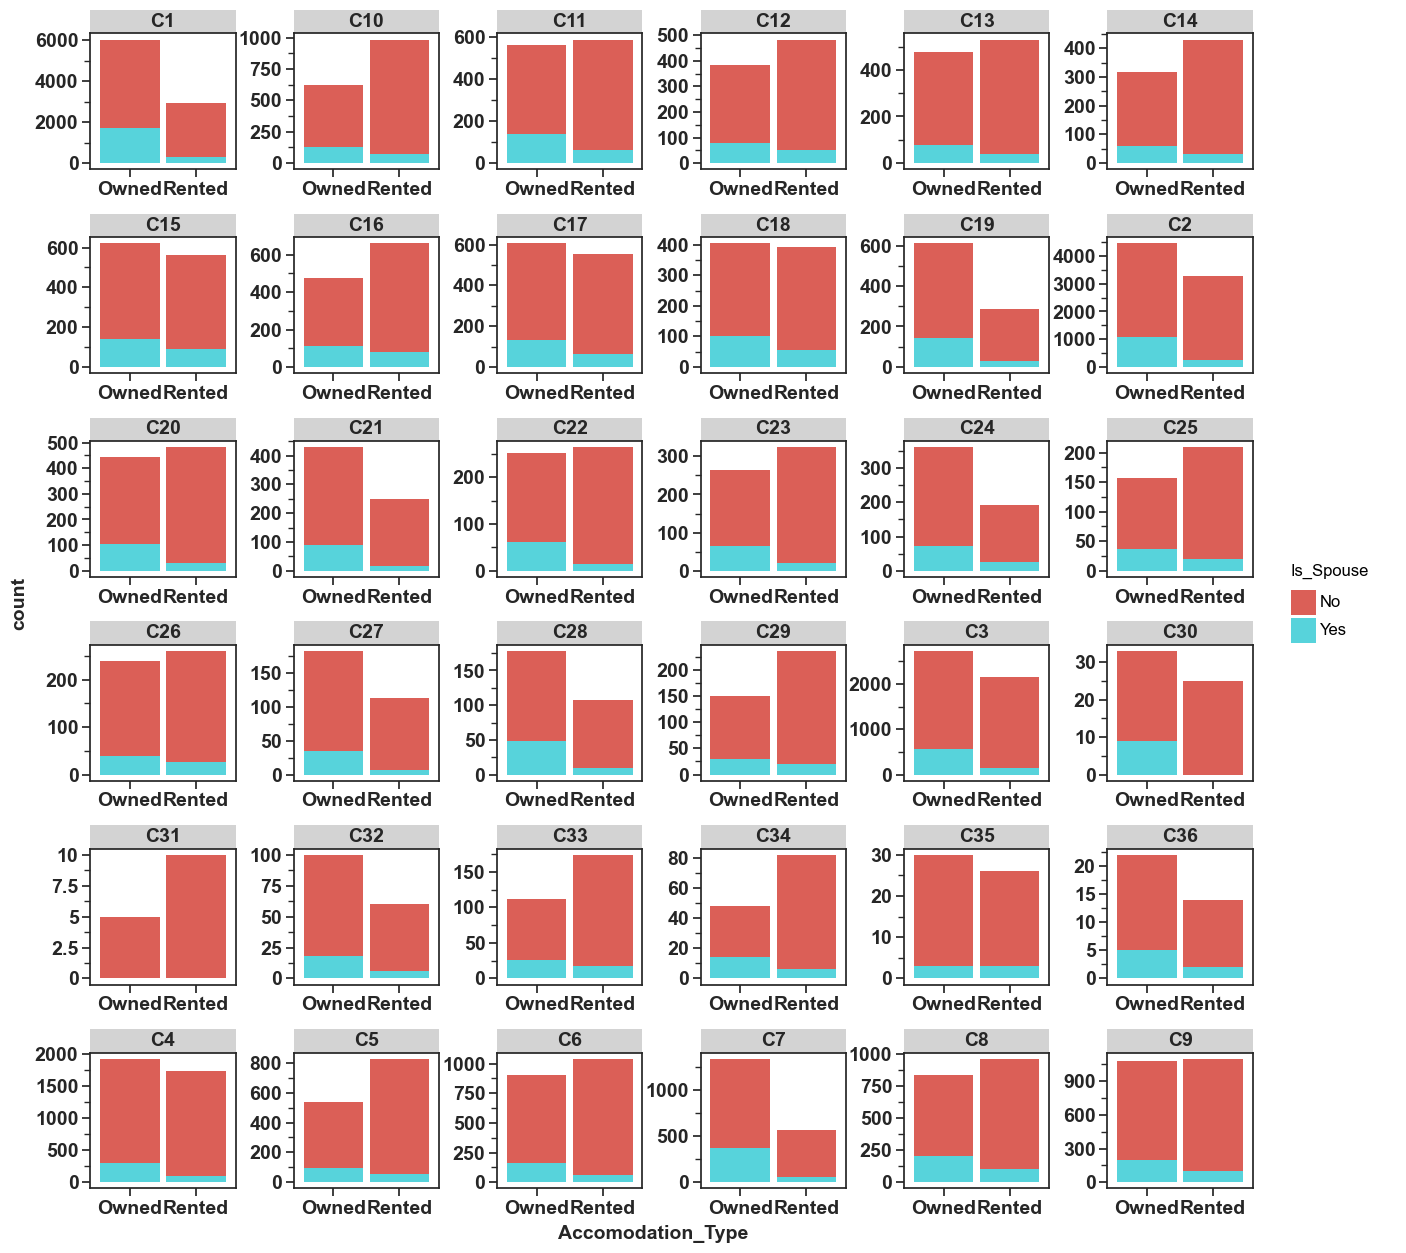

<ggplot: (4073527)>

In [43]:
(ggplot(train)+geom_bar(aes(x='Accomodation_Type',fill='Is_Spouse'))+
facet_wrap('City_Code',scales='free')+
theme_seaborn(style='ticks')+
theme(figure_size=(15,15),    subplots_adjust={'hspace': 0.5,'wspace': 0.4},
                               axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart explains that in city 31 the customers who are having own house and living in a rented house are recommended to take the joint policy with their family members or business partners. Also, the customers who are living in the rented house of City 30 recommend the same. 

### Health Indicator

#### Let's see the customer's health condition types and their responses to the new health policy.

In [44]:
train.rename(columns={'Health Indicator':'Health_Indicator'}, inplace=True)

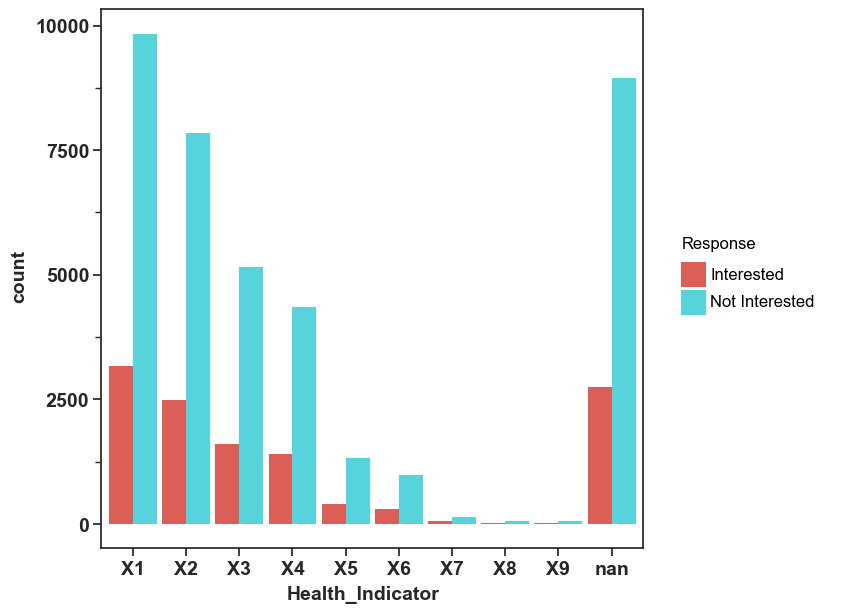

<ggplot: (-2130150573)>

In [45]:
(ggplot(train)+geom_bar(aes(x='Health_Indicator',fill='Response'), position='dodge')+
 theme_seaborn(style='ticks')+
theme(figure_size=(7,7),
                             axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))

In [46]:
train['Health_Indicator'].isnull().sum()

11691

#### The above chart explains that from health indicator X1 to X9, customer's interest in the recommended policy is gradually decreased.
#### There are 11691 customers health-related information are missing.

#### Let's see if is there any relation between customer health indicator and customer's age. Also, check their responses to the recommended policy.

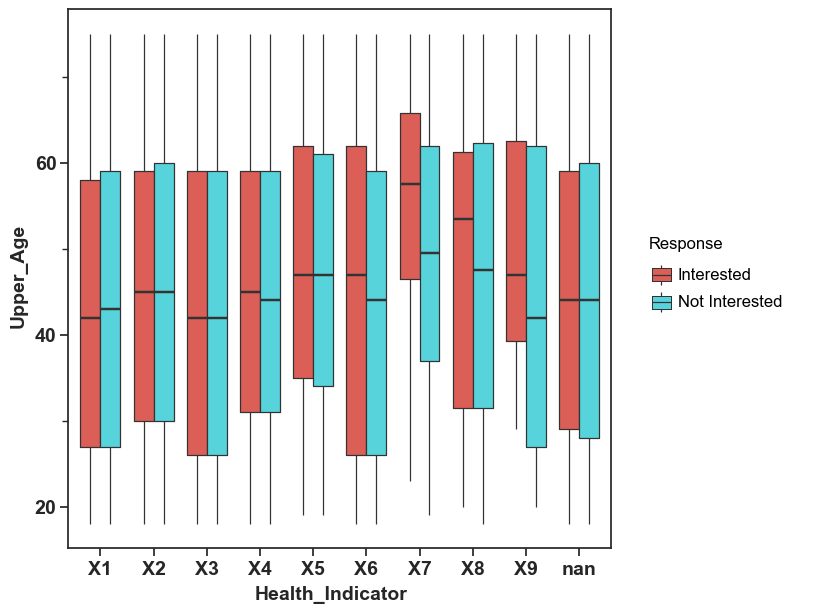

<ggplot: (17849341)>

In [47]:
(ggplot(train)+geom_boxplot(aes(x='Health_Indicator',y='Upper_Age',fill='Response'), position='dodge')+
 #facet_grid('Accomodation_Type~Reco_Insurance_Type')+
 theme_seaborn(style='ticks')+
theme(figure_size=(7,7),
                             axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))

In [48]:
train.groupby(['Health_Indicator','Response'],as_index=False).agg({'Upper_Age':['min','median','mean','max']})

Health_Indicator        Response Upper_Age                      
                                          min median       mean max
0                X1      Interested        18   42.0  43.890113  75
1                X1  Not Interested        18   43.0  44.335977  75
2                X2      Interested        18   45.0  45.449619  75
3                X2  Not Interested        18   45.0  45.499936  75
4                X3      Interested        18   42.0  43.716073  75
5                X3  Not Interested        18   42.0  43.398799  75
6                X4      Interested        18   45.0  45.862464  75
7                X4  Not Interested        18   44.0  45.331493  75
8                X5      Interested        19   47.0  48.536765  75
9                X5  Not Interested        19   47.0  47.787718  75
10               X6      Interested        18   47.0  45.342020  75
11               X6  Not Interested        18   44.0  43.789311  75
12               X7      Interested        23   57.5  54.983871  75
13               X7  Not Interested        19   49.5  49.238806  75
14               X8      Interested        20   53.5  48.555556  75
15               X8  Not Interested        18   47.5  47.083333  75
16               X9      Interested        29   47.0  49.428571  75
17               X9  Not Interested        20   42.0  44.183673  75

#### The above chart explains that there is a significant difference in customer's age and customer health condition indicator types.

#### Let's see the is there any relation between customer's age and their health condition indicator and also, cross-check those results with their recommended policy and their accommodation type.

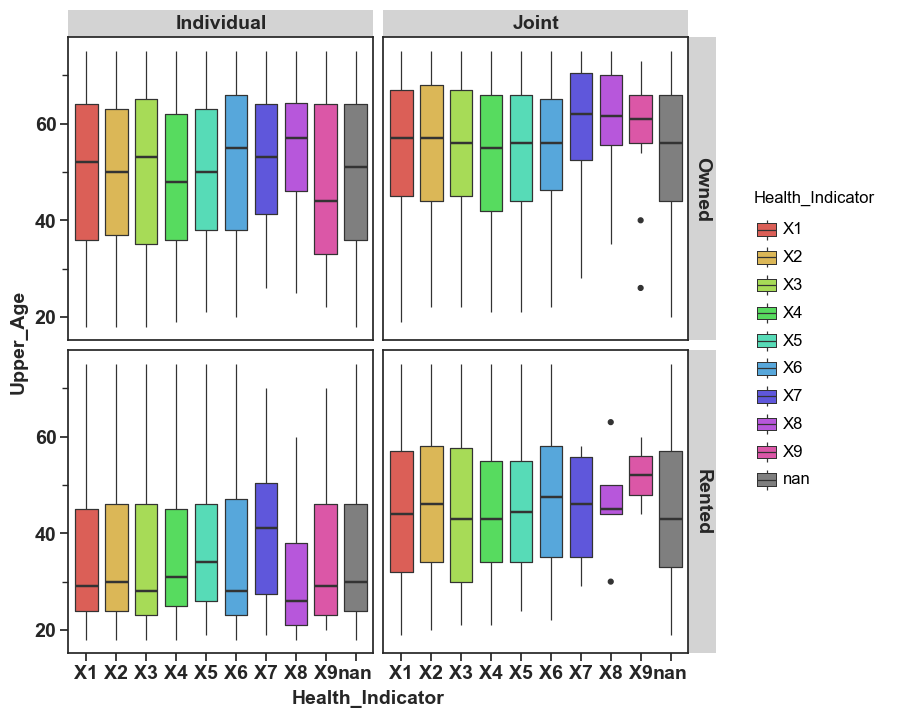

<ggplot: (17849131)>

In [49]:
(ggplot(train)+geom_boxplot(aes(x='Health_Indicator',y='Upper_Age',fill='Health_Indicator'), position='dodge')+
 facet_grid('Accomodation_Type~Reco_Insurance_Type')+
 theme_seaborn(style='ticks')+
theme(figure_size=(8,8),
                             axis_text=element_text(style='normal',size=14,weight='bold'),
                             axis_title=element_text(style='normal',size=14,weight='bold'),
                             strip_text=element_text(style='normal',size=14,weight='bold')))

In [50]:
train.groupby(['Health_Indicator','Reco_Insurance_Type','Accomodation_Type'],as_index=False).agg({'Upper_Age':['min','median','mean','max']})

Health_Indicator Reco_Insurance_Type Accomodation_Type Upper_Age         \
                                                                min median   
0                X1          Individual             Owned        18   52.0   
1                X1          Individual            Rented        18   29.0   
2                X1               Joint             Owned        19   57.0   
3                X1               Joint            Rented        19   44.0   
4                X2          Individual             Owned        18   50.0   
5                X2          Individual            Rented        18   30.0   
6                X2               Joint             Owned        22   57.0   
7                X2               Joint            Rented        20   46.0   
8                X3          Individual             Owned        18   53.0   
9                X3          Individual            Rented        18   28.0   
10               X3               Joint             Owned        22   56.0   
11               X3               Joint            Rented        21   43.0   
12               X4          Individual             Owned        19   48.0   
13               X4          Individual            Rented        18   31.0   
14               X4               Joint             Owned        21   55.0   
15               X4               Joint            Rented        21   43.0   
16               X5          Individual             Owned        21   50.0   
17               X5          Individual            Rented        19   34.0   
18               X5               Joint             Owned        21   56.0   
19               X5               Joint            Rented        24   44.5   
20               X6          Individual             Owned        20   55.0   
21               X6          Individual            Rented        18   28.0   
22               X6               Joint             Owned        22   56.0   
23               X6               Joint            Rented        22   47.5   
24               X7          Individual             Owned        26   53.0   
25               X7          Individual            Rented        19   41.0   
26               X7               Joint             Owned        28   62.0   
27               X7               Joint            Rented        29   46.0   
28               X8          Individual             Owned        25   57.0   
29               X8          Individual            Rented        18   26.0   
30               X8               Joint             Owned        35   61.5   
31               X8               Joint            Rented        30   45.0   
32               X9          Individual             Owned        22   44.0   
33               X9          Individual            Rented        20   29.0   
34               X9               Joint             Owned        26   61.0   
35               X9               Joint            Rented        44   52.0   

                   
         mean max  
0   50.319944  75  
1   35.491056  75  
2   55.405911  75  
3   45.631893  75  
4   49.806391  75  
5   35.908582  75  
6   55.324927  75  
7   46.602041  75  
8   50.595588  75  
9   35.131183  75  
10  55.229443  75  
11  44.426230  75  
12  48.638407  75  
13  35.980790  75  
14  54.085399  75  
15  44.854730  75  
16  50.376011  75  
17  37.234649  75  
18  55.207506  75  
19  45.631579  75  
20  51.873508  75  
21  35.615509  75  
22  55.385542  75  
23  46.736842  75  
24  51.976744  75  
25  39.978723  70  
26  58.966102  75  
27  44.750000  58  
28  54.406250  75  
29  30.680000  60  
30  59.937500  75  
31  46.400000  63  
32  46.782609  75  
33  36.920000  70  
34  58.000000  73  
35  52.000000  60

#### The above chart explains that the health indicator types vary with the average age of customers who are living in their own house and rent house and also recommended policy also varies based on the age.

#### Let's compare city and customer's health indicator types and customer's upper age.

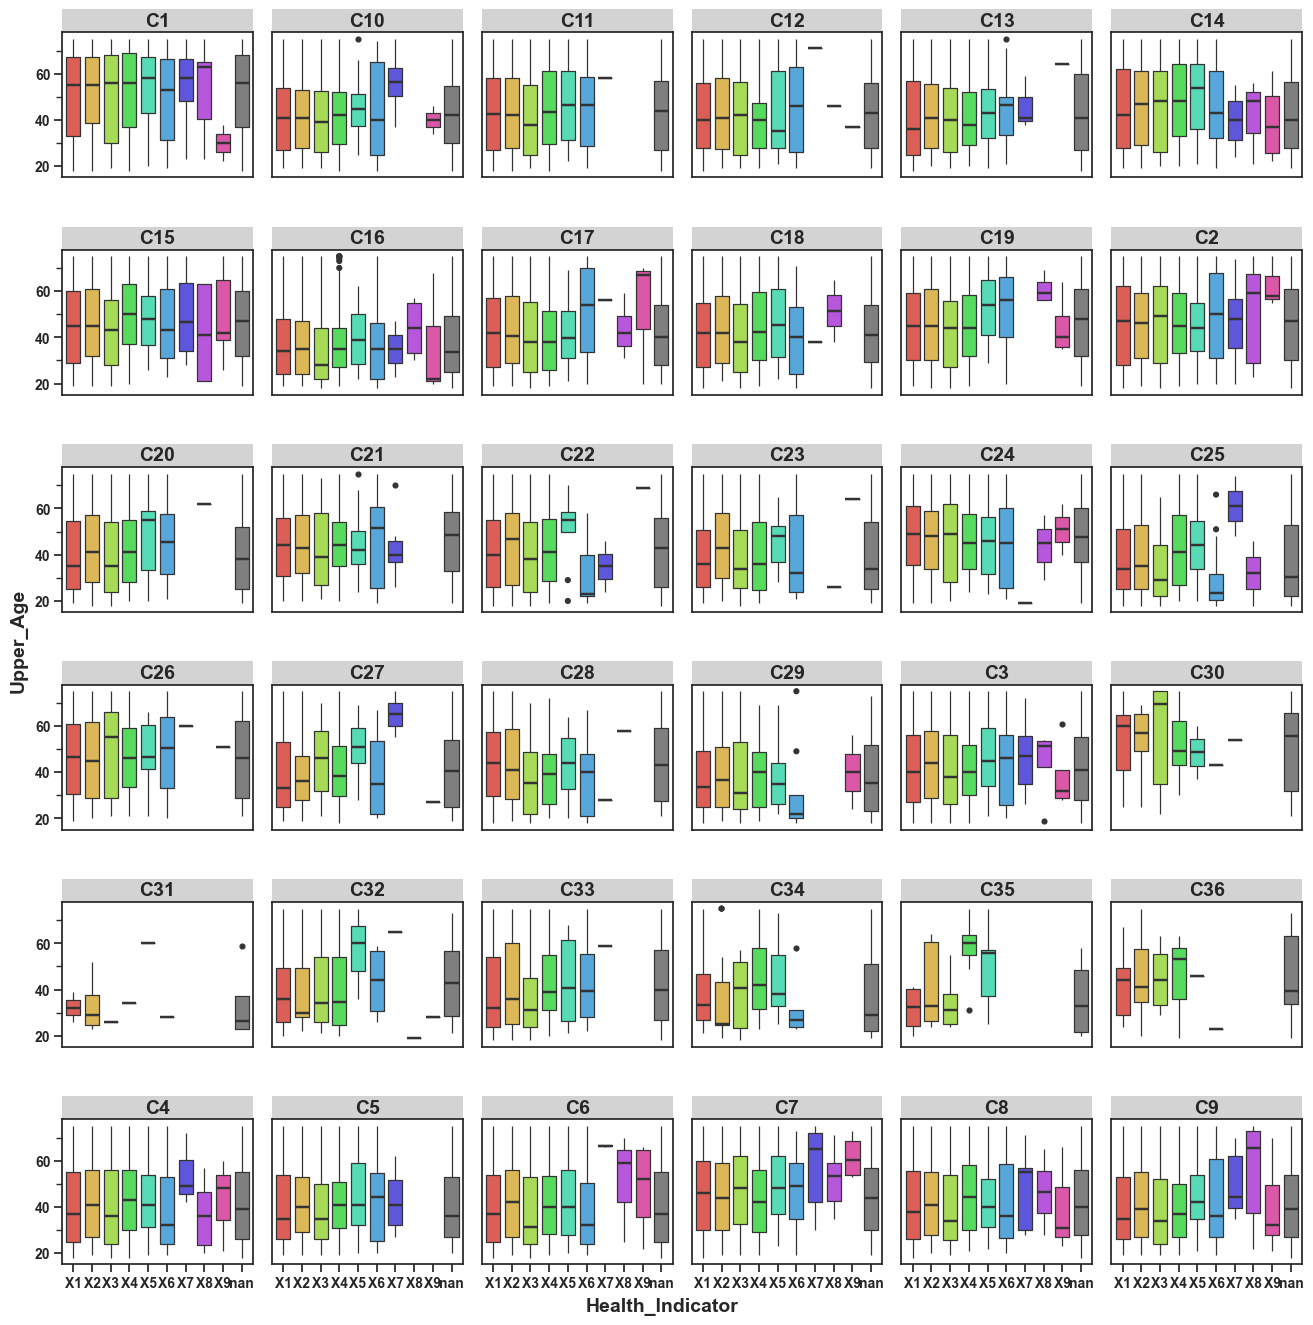

<ggplot: (17257677)>

In [51]:
(ggplot(train)+geom_boxplot(aes(x='Health_Indicator',y='Upper_Age',fill='Health_Indicator'), position='dodge')+
facet_wrap('City_Code')+
theme_seaborn(style='ticks')+
theme(figure_size=(16,16), 
      legend_position='none',
      
subplots_adjust={'hspace': 0.5,'wspace':0.1},      
axis_text=element_text(style='normal',size=10,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The average age of the customer has varied in the types of health indicators and the city in which customers are living.

### Holding Policy Duration

In [52]:
#train.groupby(['Holding_Policy_Duration','Response'],as_index=False)['Response'].agg({'total':'count'}).sort_values(by='total',ascending=False)

#### Let's see various holding policy duration which are having by customers and their responses to recommended policies.

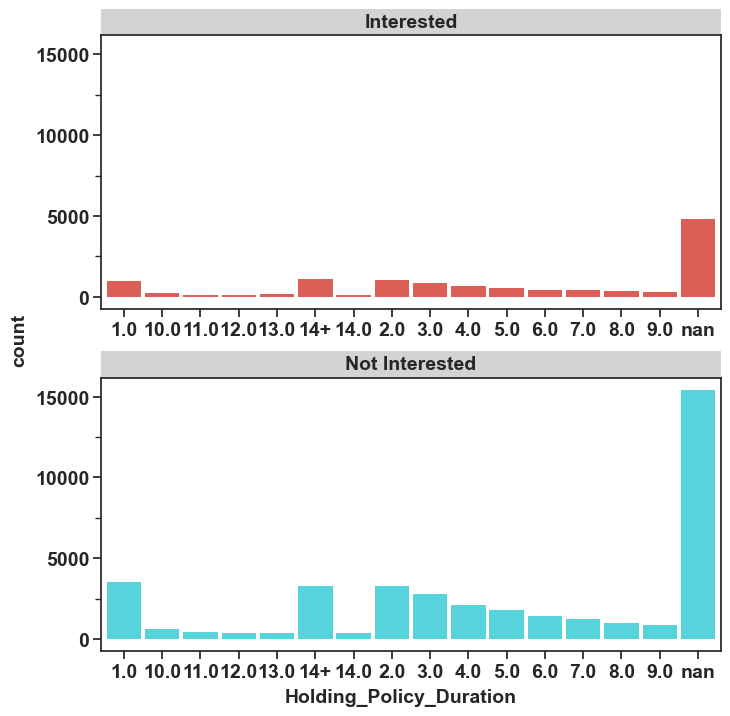

<ggplot: (12925338)>

In [53]:
(ggplot(train)+geom_bar(aes(x='Holding_Policy_Duration',fill='Response'), position='dodge')+
theme_seaborn(style='ticks')+
facet_wrap('Response',nrow=2,scales='free_x')+
theme(figure_size=(8,8),
legend_position='none',
subplots_adjust={'hspace': 0.25,'wspace':0.1},
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [54]:
train['Holding_Policy_Duration'].isnull().sum()

20251

#### The above chart explains that customers who are holding 1 to 5 years duration policies are interested to take recommended policies.

#### There are 20251 customer's information of holding policy duration information is missing.

#### Let's see if there is a relationship between customer age and holding policy types. Then check their responses in recommended policies.

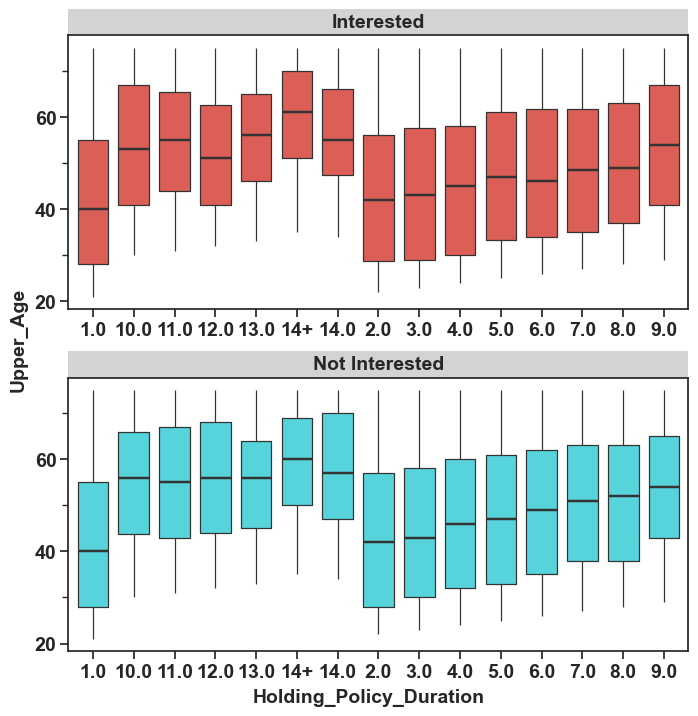

<ggplot: (-2134641804)>

In [55]:
(ggplot(train.dropna())+geom_boxplot(aes(x='Holding_Policy_Duration',y='Upper_Age',fill='Response'))+
theme_seaborn(style='ticks')+
facet_wrap('Response',nrow=2,scales='free')+
theme(figure_size=(8,8),
legend_position='none',
subplots_adjust={'hspace': 0.25,'wspace':0.1},
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [56]:
train.groupby(['Holding_Policy_Duration','Response'], dropna=True,as_index = False).agg({'Upper_Age':['min','median','mean','max']})

Holding_Policy_Duration        Response Upper_Age                      
                                                 min median       mean max
0                      1.0      Interested        21   39.0  41.987964  75
1                      1.0  Not Interested        21   40.0  42.630782  75
2                     10.0      Interested        30   53.0  53.265766  75
3                     10.0  Not Interested        30   55.0  54.373942  75
4                     11.0      Interested        31   55.0  54.452555  75
5                     11.0  Not Interested        31   56.0  54.911980  75
6                     12.0      Interested        32   51.5  53.730769  75
7                     12.0  Not Interested        32   56.0  55.496084  75
8                     13.0      Interested        33   55.0  54.942029  75
9                     13.0  Not Interested        33   56.0  55.857909  75
10                     14+      Interested        35   60.0  59.410304  75
11                     14+  Not Interested        35   60.0  59.144089  75
12                    14.0      Interested        34   55.0  55.426087  75
13                    14.0  Not Interested        34   59.0  58.014245  75
14                     2.0      Interested        22   42.0  43.474777  75
15                     2.0  Not Interested        22   41.0  43.670052  75
16                     3.0      Interested        23   43.0  44.711538  75
17                     3.0  Not Interested        23   44.0  45.288671  75
18                     4.0      Interested        24   45.0  45.880060  75
19                     4.0  Not Interested        24   46.0  46.817490  75
20                     5.0      Interested        25   47.0  48.172291  75
21                     5.0  Not Interested        25   47.0  47.858810  75
22                     6.0      Interested        26   47.0  48.433708  75
23                     6.0  Not Interested        26   50.0  49.566598  75
24                     7.0      Interested        27   50.0  50.234043  75
25                     7.0  Not Interested        27   50.0  50.392799  75
26                     8.0      Interested        28   49.5  50.668639  75
27                     8.0  Not Interested        28   51.5  51.145194  75
28                     9.0      Interested        29   54.0  53.860377  75
29                     9.0  Not Interested        29   53.0  53.024735  75

#### The above chart explains that the customers who are in the age range of 30 and above have 10 to 13-year duration policies.
#### 21-year-old customers are having 1-year duration policies at the same time they are interested to take recommended policies.
#### some 35 and above age customers are having 14 years and above duration policies, they are also interested to take recommended policies same as the customers who are having 1 to 5-year duration policies.

### Holding Policy Type

#### Let's see if there is any relationship between holding policy type and its duration.

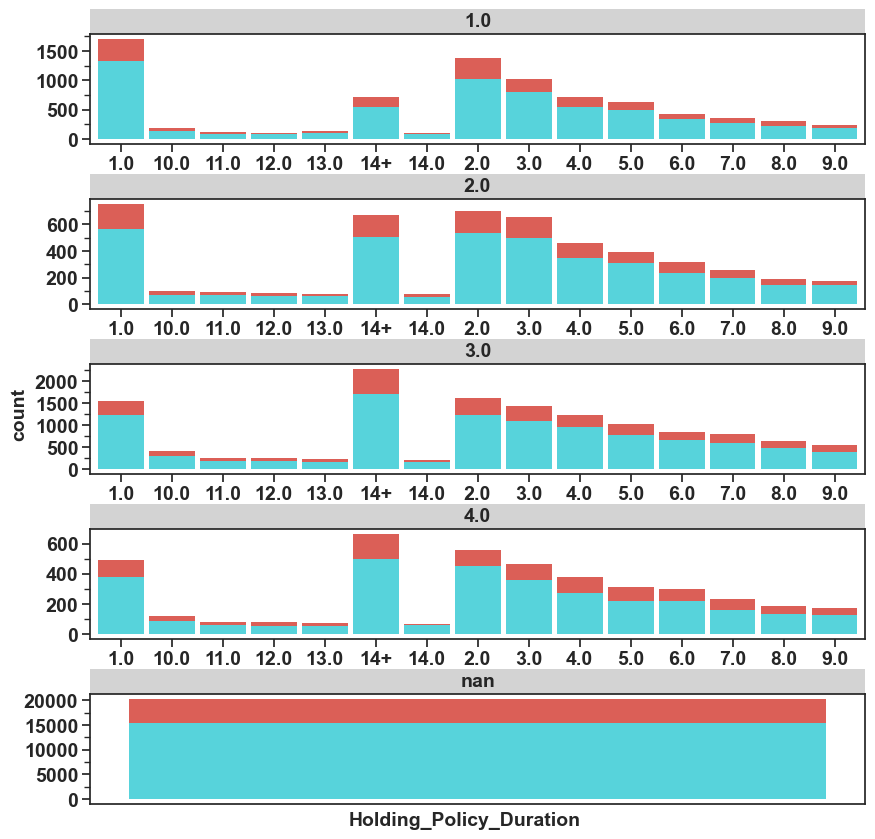

<ggplot: (-2129749478)>

In [57]:
(ggplot(train)+geom_bar(aes(x='Holding_Policy_Duration',fill='Response'))+
theme_seaborn(style='ticks')+
facet_wrap('Holding_Policy_Type',nrow=5,scales='free')+
theme(figure_size=(10,10),
legend_position='none',
subplots_adjust={'hspace': 0.5,'wspace':0.1},
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [58]:
train.groupby(['Holding_Policy_Type'],as_index=False)['Holding_Policy_Type'].agg({'total':'count'}).sort_values(by='total',ascending=False)

,Holding_Policy_Type,total
2,3.0,13279
0,1.0,8173
1,2.0,5005
3,4.0,4174


In [59]:
train['Holding_Policy_Type'].isnull().sum()

20251

#### The above chart explains that each type of policy has 1 to 14 year and above duration policies.
#### More customers have taken the type 3 policy.
#### There are 20251 customer's holding policy type information are missing.

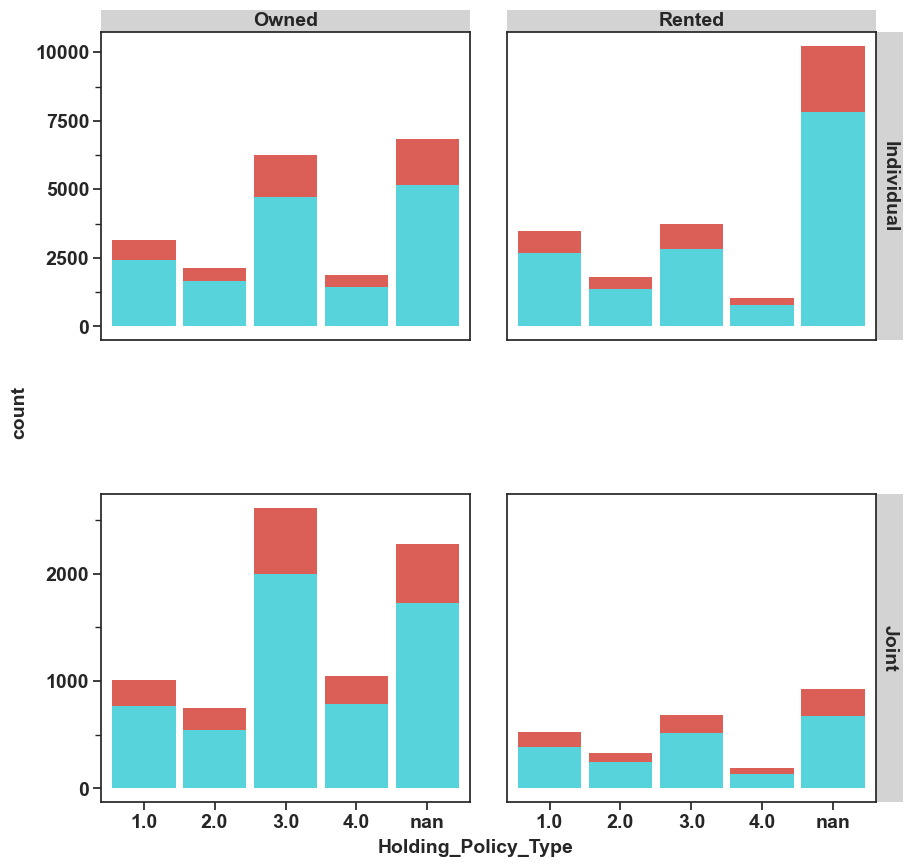

<ggplot: (12943623)>

In [60]:
(ggplot(train.astype({'Holding_Policy_Type':'str'}))+geom_bar(aes(x='Holding_Policy_Type',fill='Response'))+
theme_seaborn(style='ticks')+
facet_grid('Reco_Insurance_Type~Accomodation_Type',scales='free')+
theme(figure_size=(10,10),
legend_position='none',
subplots_adjust={'hspace': 0.5,'wspace':0.1},
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### Type 3 policies are taken by more customers those customers are highly interested to take recommended policies.

#### Let's see city-wise customers holding policy types and their responses to the recommended policies.

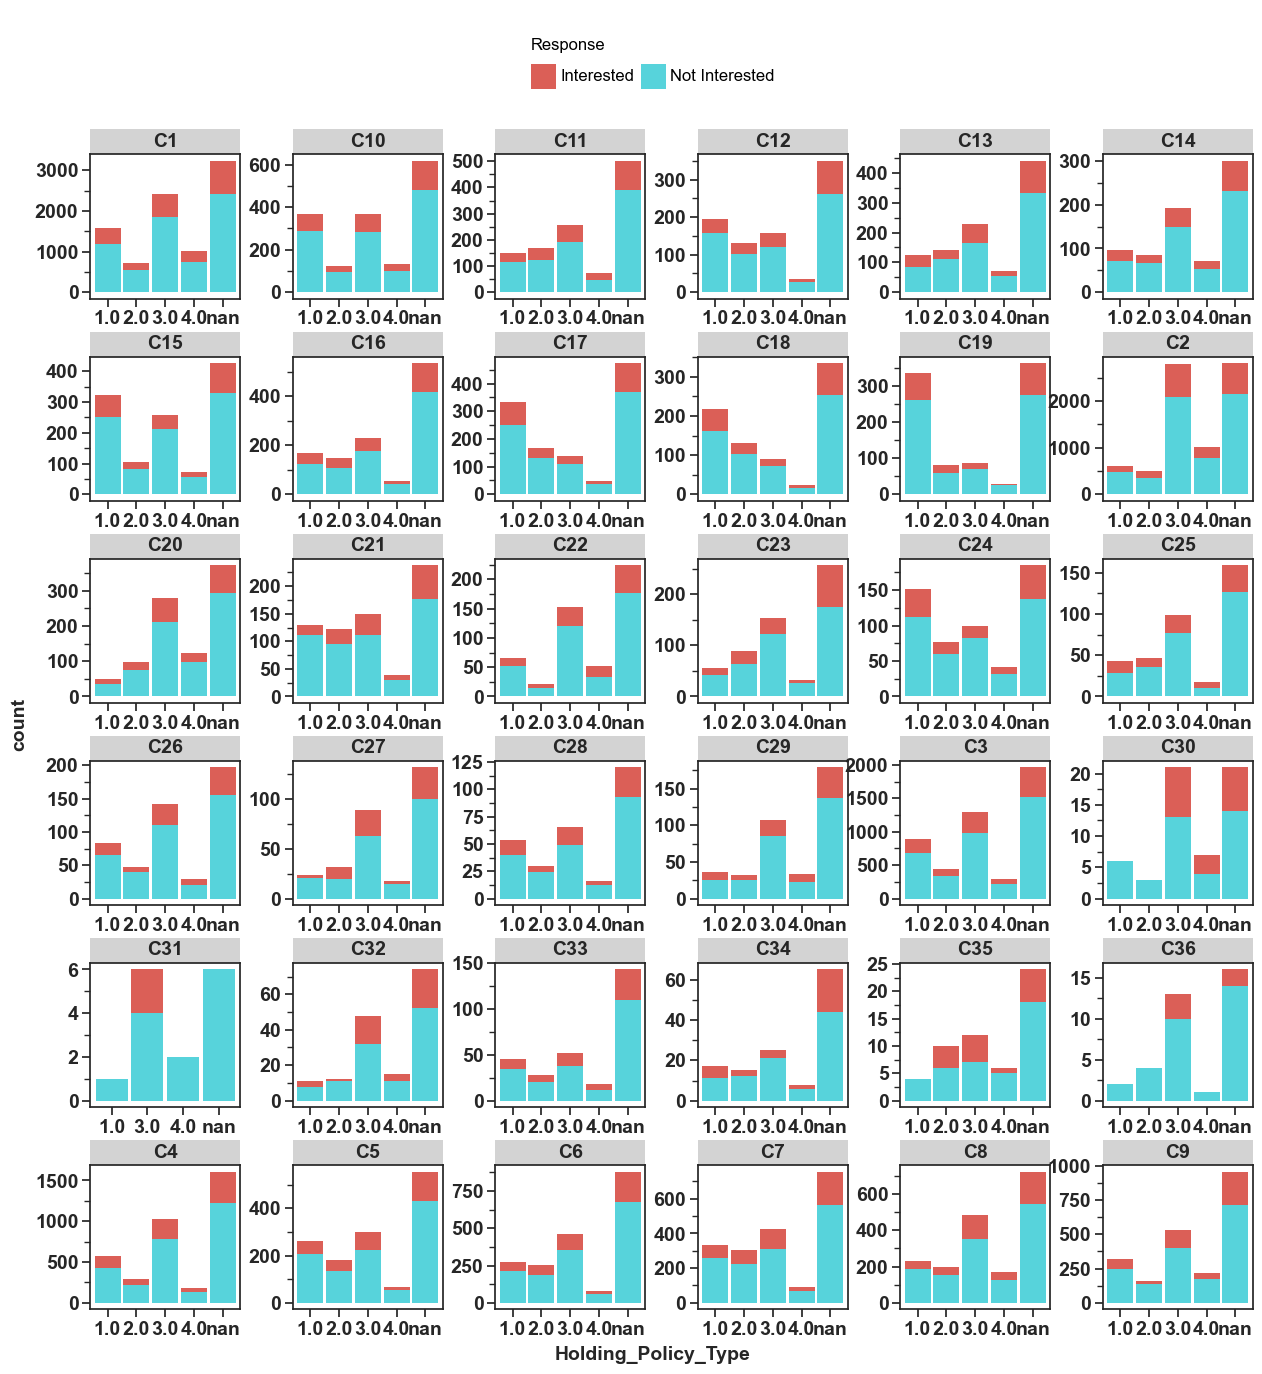

<ggplot: (4013325)>

In [61]:
(ggplot(train.astype({'Holding_Policy_Type': 'str'}))+geom_bar(aes(x='Holding_Policy_Type',fill='Response'))+
theme_seaborn(style='ticks')+
facet_wrap('City_Code',scales='free')+
theme(figure_size=(15,15),
subplots_adjust={'hspace': 0.4,'wspace':0.35},
legend_position='top',
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health_Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  object 
dtypes: float64(2), int64(5

## Test Dataset

#### Let's take a quick visualation of test dataset columns.

#### Let's see a quick view of categorical column distribution and check if there is any difference between train and test dataset categorical column levels. 

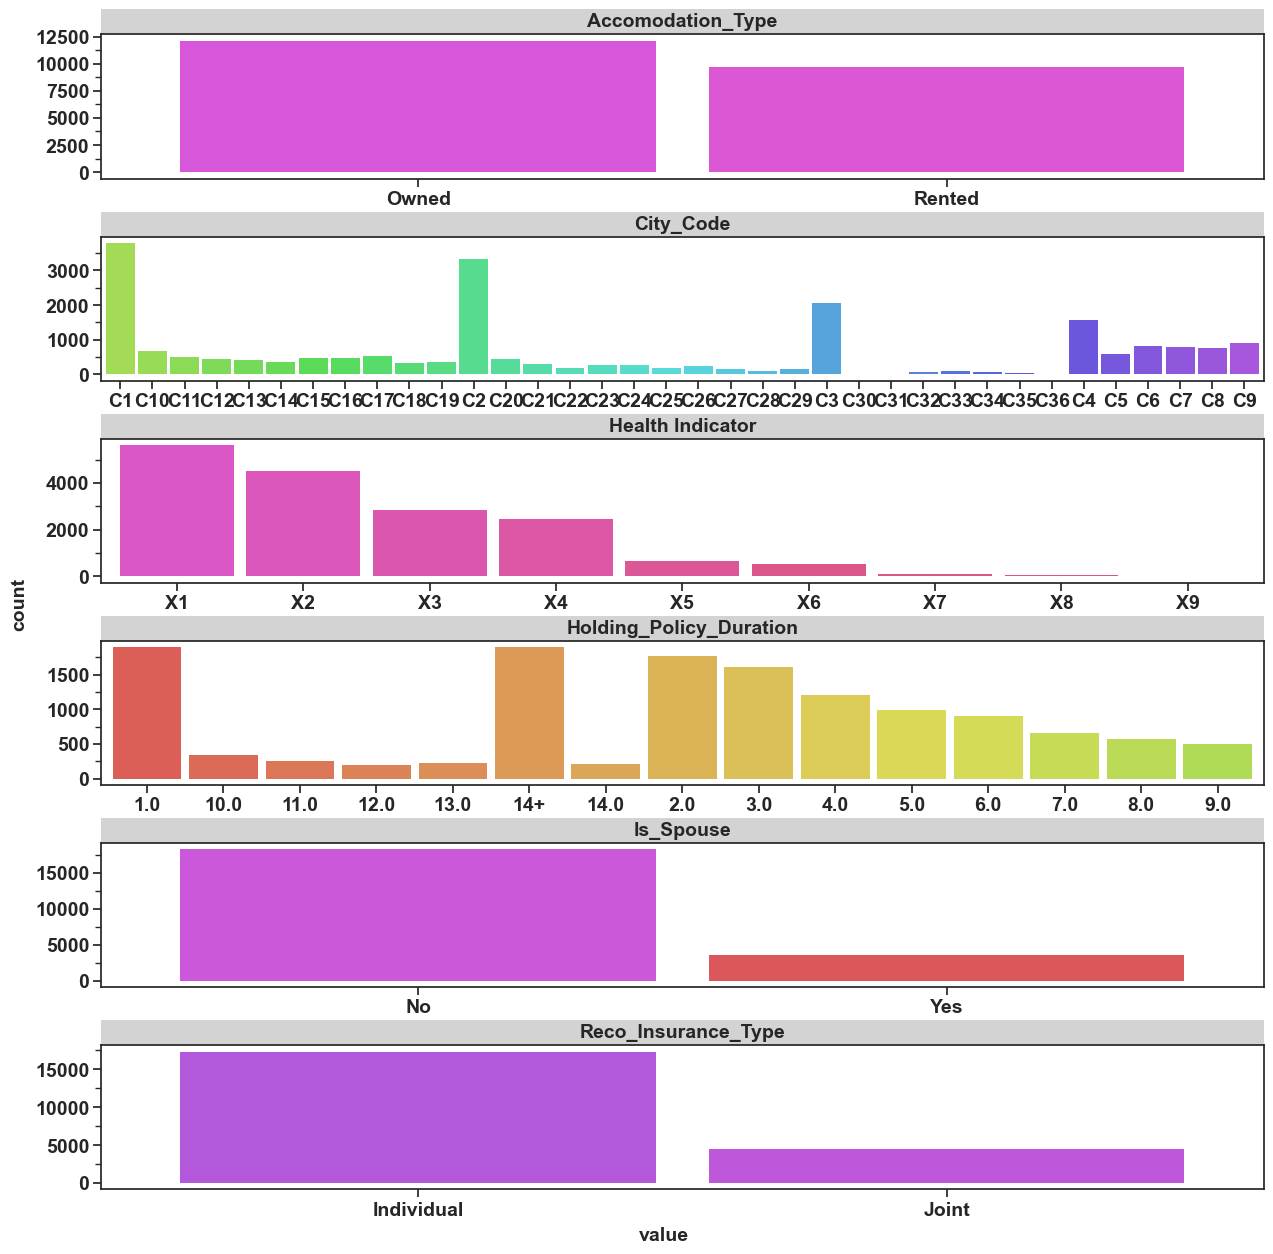

<ggplot: (-2130168662)>

In [110]:
(ggplot(test.select_dtypes(include='object').stack().rename('value').reset_index())+
 geom_bar(aes(x='value',fill='value'))+
theme_seaborn(style='ticks')+
facet_wrap('level_1',scales='free',nrow=6)+
theme(figure_size=(15,15),
subplots_adjust={'hspace': 0.4,'wspace':0.35},
legend_position='none',
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### The above chart explains that there is no difference in categorical column levels between the train and test datasets.

#### Let's see a quick view of numerical column distribution.

C:\Users\Balaji\AppData\Local\Programs\Python\Python38-32\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 604'. Pick better value with 'binwidth'.


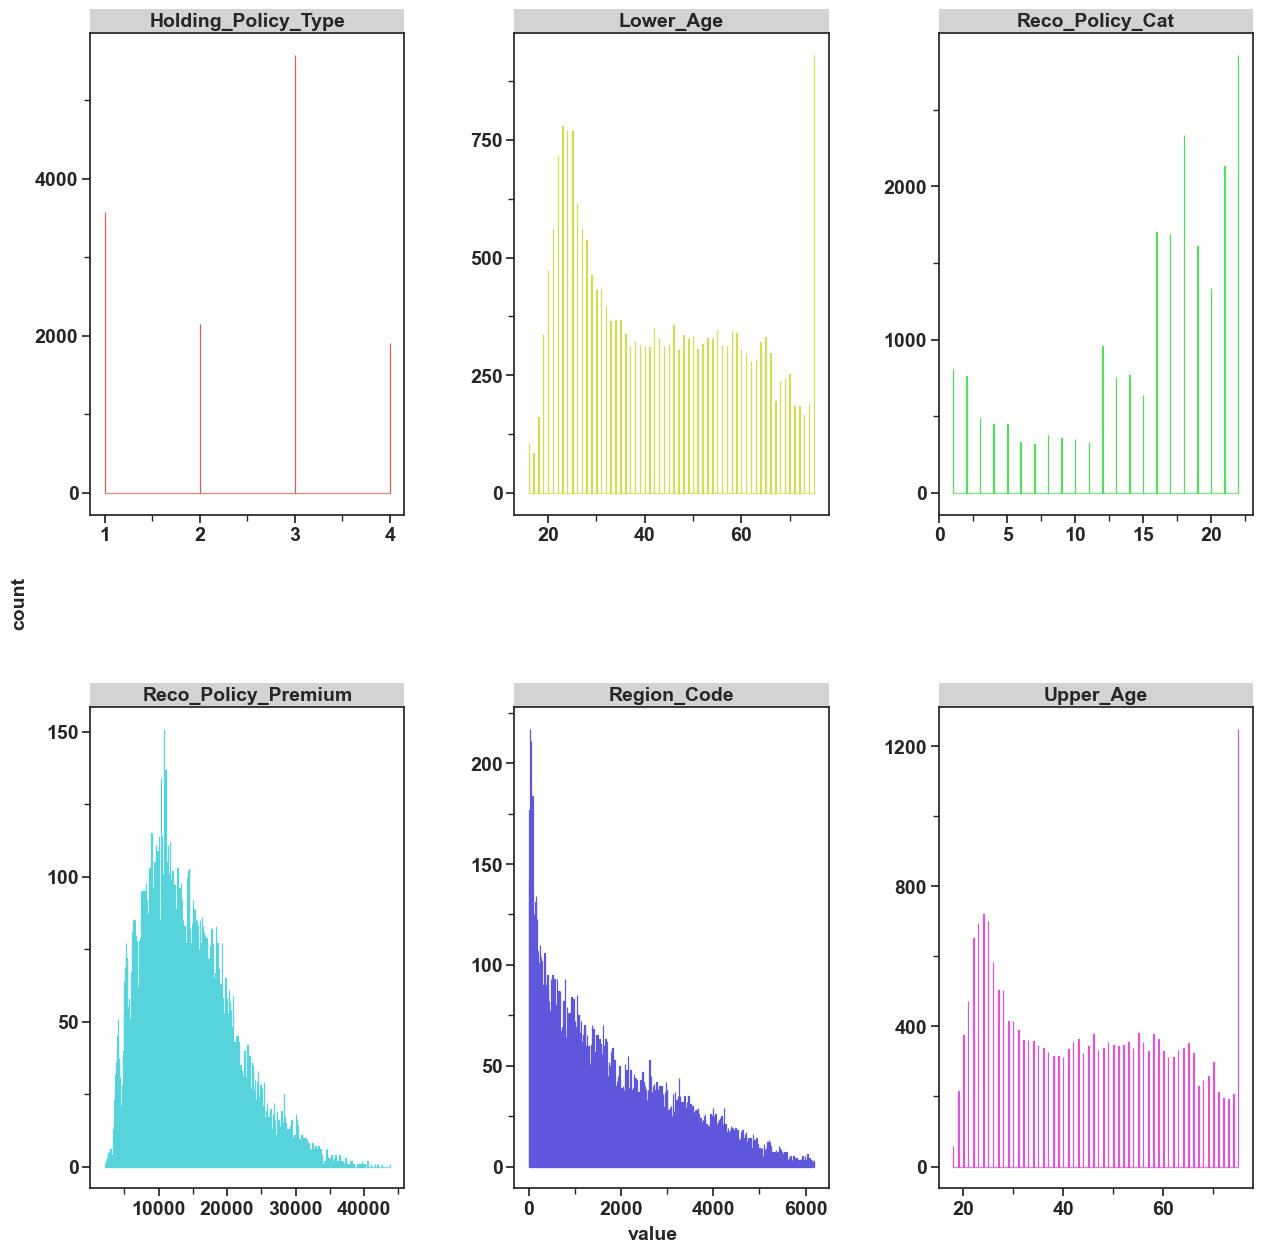

<ggplot: (-2129994931)>

In [128]:
(ggplot(test.iloc[:,1:13].select_dtypes(exclude='object').stack().rename('value').reset_index())+
 geom_histogram(aes(x='value',color='level_1'))+
theme_seaborn(style='ticks')+
facet_wrap('level_1',scales='free')+
theme(figure_size=(15,15),
subplots_adjust={'hspace': 0.4,'wspace':0.35},
legend_position='none',
axis_text=element_text(style='normal',size=14,weight='bold'),
axis_title=element_text(style='normal',size=14,weight='bold'),
strip_text=element_text(style='normal',size=14,weight='bold')))

#### So far we have done exploratory data analysis in various way ,

 * **Univariate Analysis**
 * **Bi-Variate Analysis**
 * **Multi_Variate Analysis**
 
#### This analysis tells that the customers who are living in the city C1 to C10 and having their own house are highly interested to take recommended policies.

#### Individual policy is recommended to most customers and those customers are highly interested to take it.

#### Customers who are in the age of 20 to '30s and living in a rented house are interested to take recommended policies when compared to the same age group customers who are living in the own house.
